# Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ground truth data/ground_truth_subjects.csv", header = None)
print(df)


                      0
0  Subject39_1526417507
1  Subject39_1526591202
2  Subject42_1527280030
3  Subject43_1527806941
4  Subject54_1539288817
5  Subject55_1539459892


In [ ]:
subjects = df[0].values
print(subjects)


['Subject39_1526417507' 'Subject39_1526591202' 'Subject42_1527280030'
 'Subject43_1527806941' 'Subject54_1539288817' 'Subject55_1539459892']


# Access file paths of

In [ ]:
def get_file_paths(subjects):
    # List that stores path to CSV training files
    file_paths = [] # Initiated list for storing path to dataset
    for subject in subjects:


        piezo_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/{subject[10:]}.csv"


        breath_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/breathrates.csv"


        heart_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/heartrates.csv"


        jpeaks_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/jpeaks.csv"

        file_paths.append((piezo_path, breath_path, heart_path, jpeaks_path))
    return file_paths

# Training + Testing dataset addresses stored
file_paths = get_file_paths(subjects)
print(file_paths)


# Output : List of (tuples containing address of dataset CSVs)

[('/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/1526417507.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/heartrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/jpeaks.csv'), ('/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/1526591202.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/heartrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/jpeaks.csv'), ('/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527280030/1527280030.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527280030/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527

In [ ]:
for i in subjects:
  print(i)

Subject39_1526417507
Subject39_1526591202
Subject42_1527280030
Subject43_1527806941
Subject54_1539288817
Subject55_1539459892


plots for Subject39_1526417507


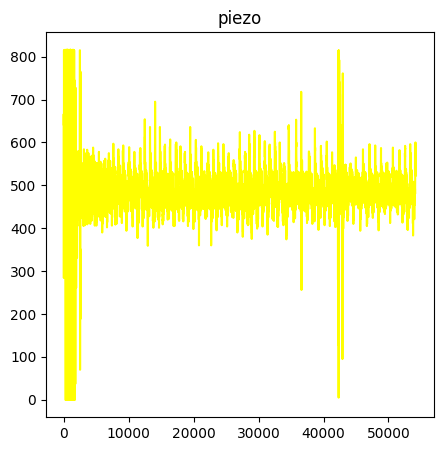

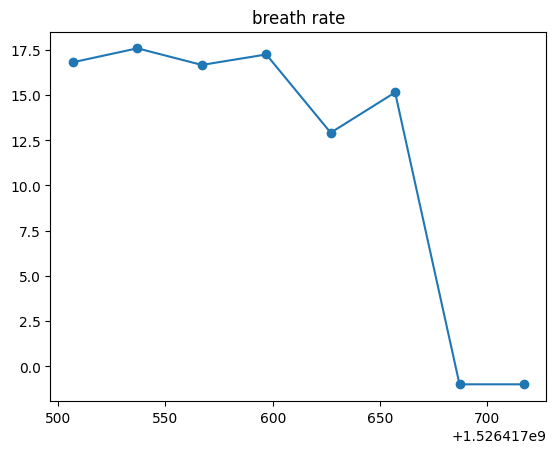

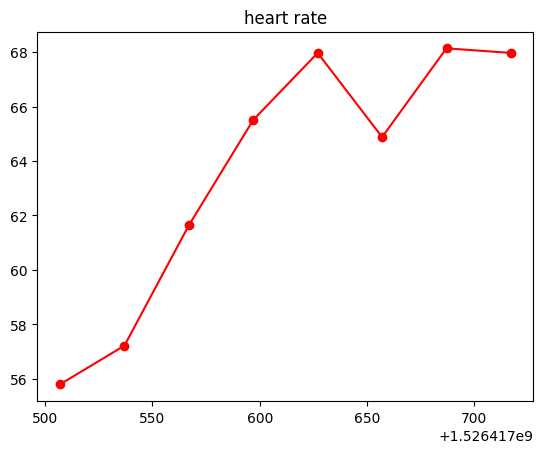

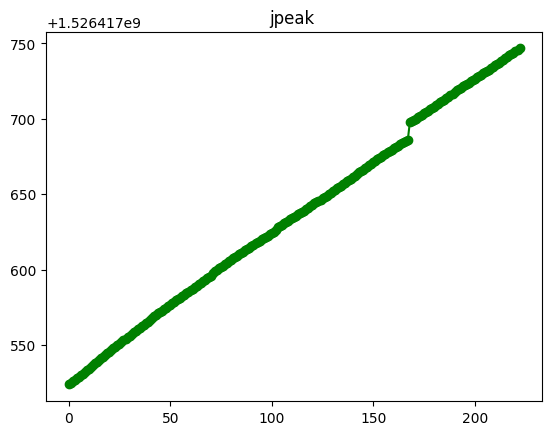

plots for Subject39_1526591202


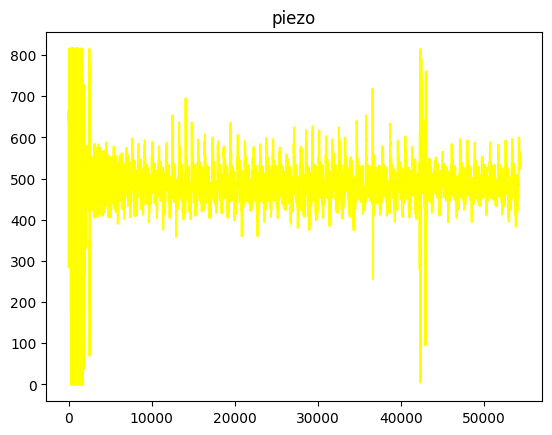

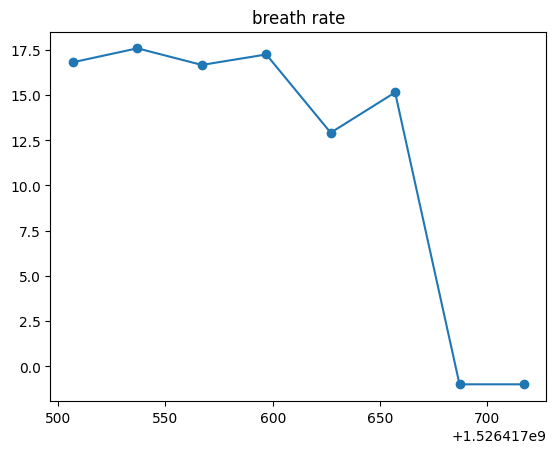

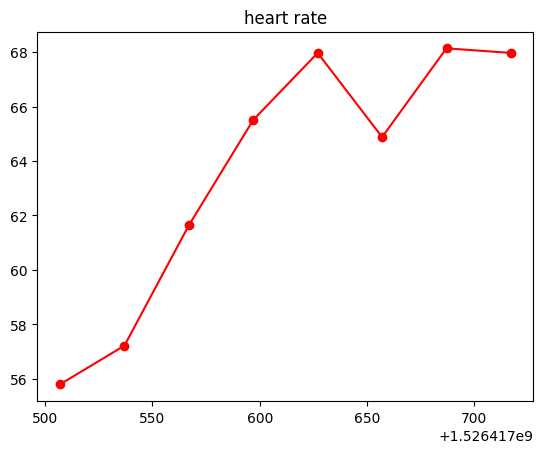

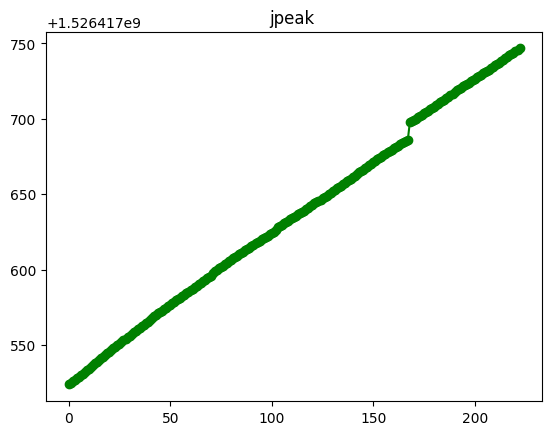

plots for Subject42_1527280030


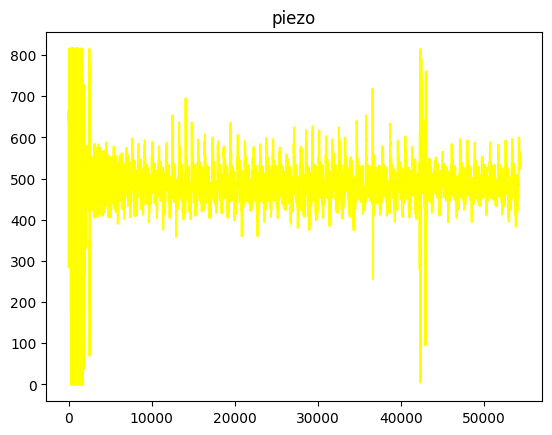

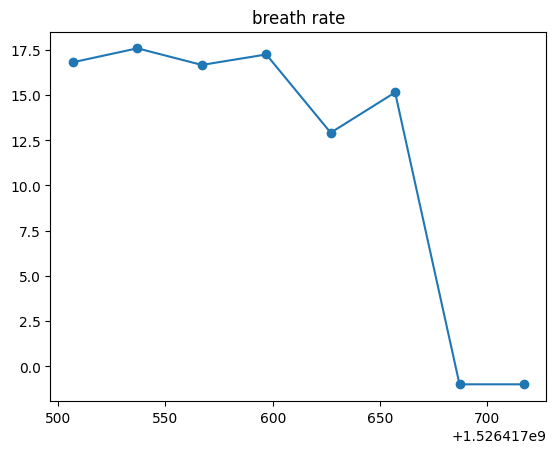

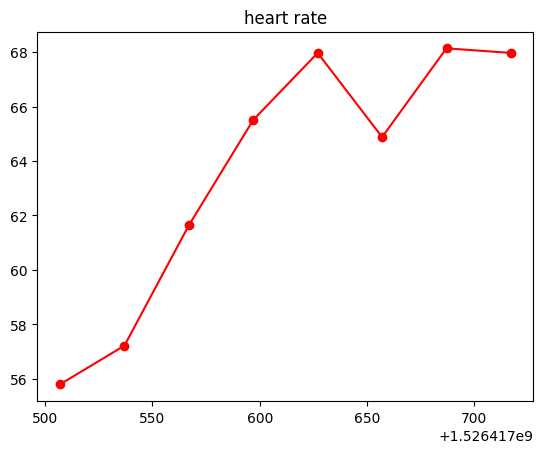

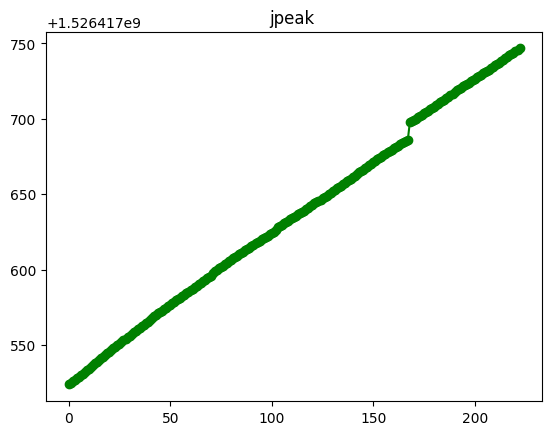

plots for Subject43_1527806941


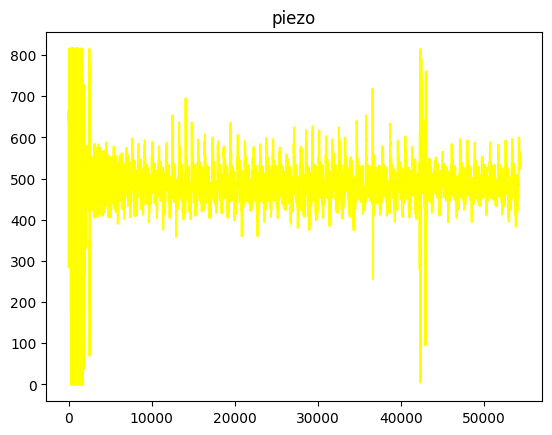

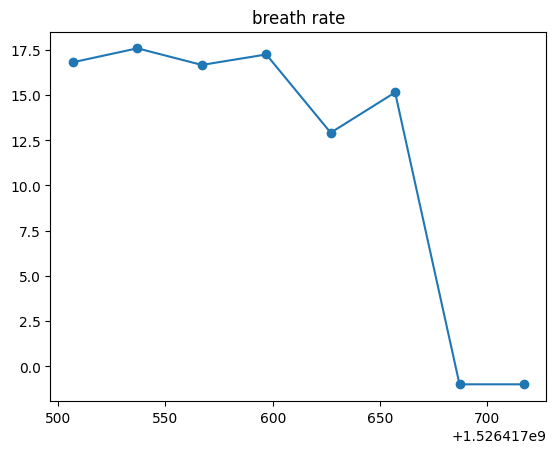

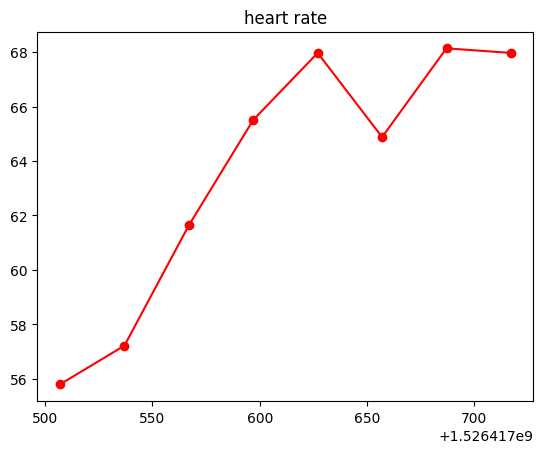

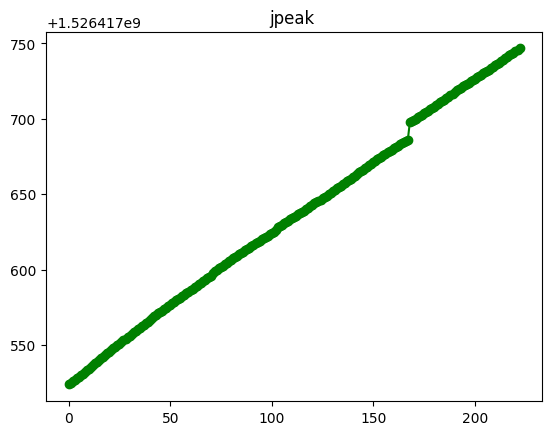

plots for Subject54_1539288817


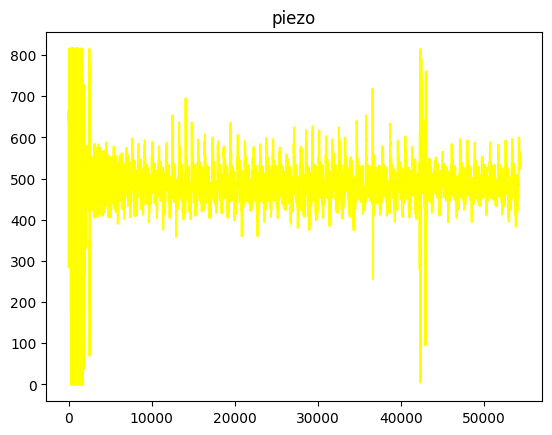

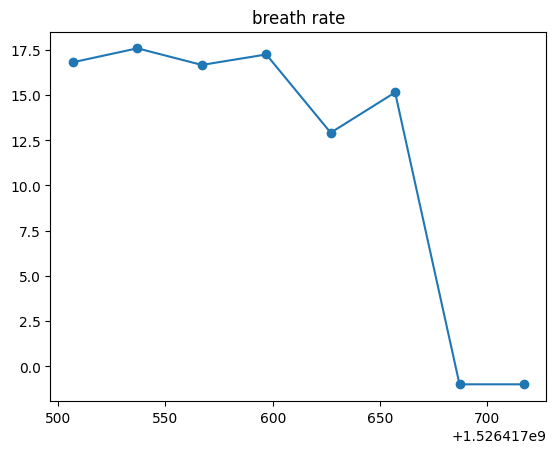

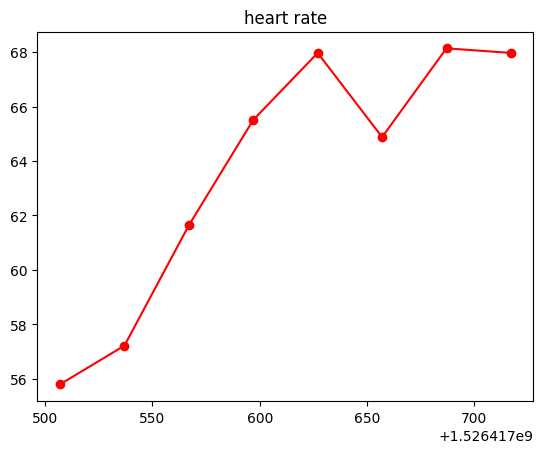

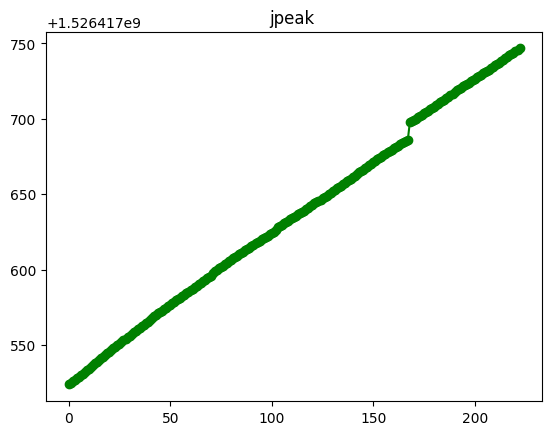

plots for Subject55_1539459892


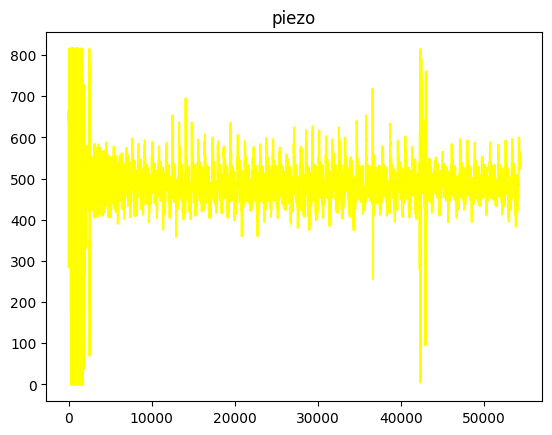

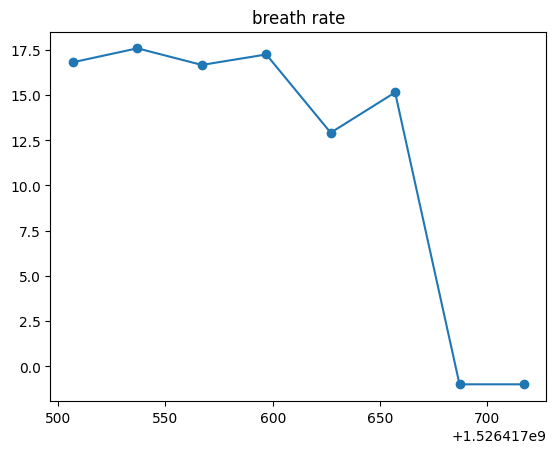

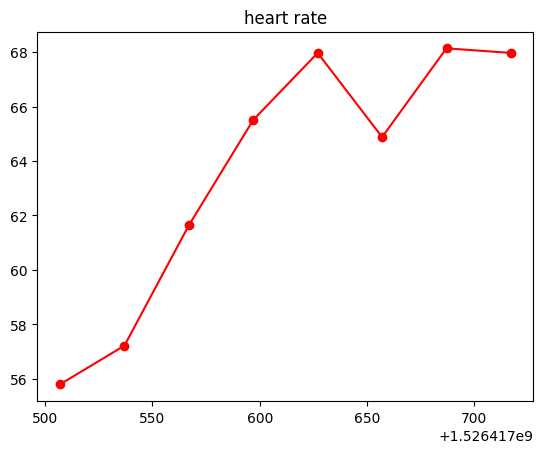

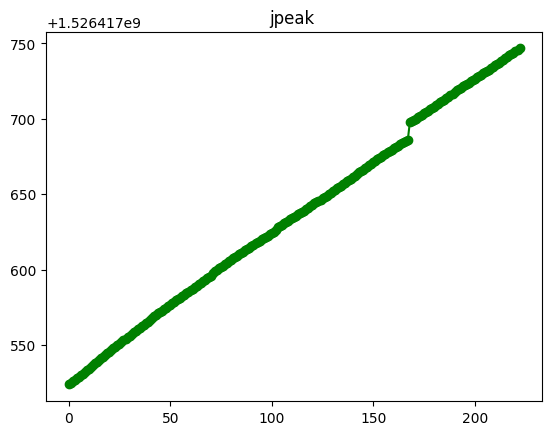

plots for Subject39_1526417507


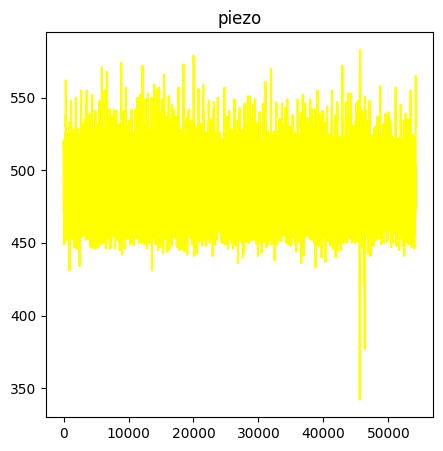

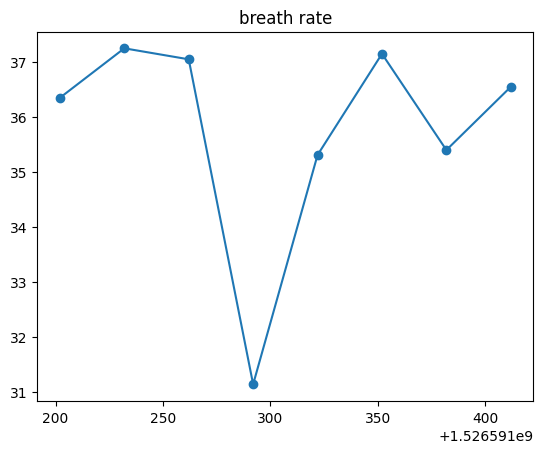

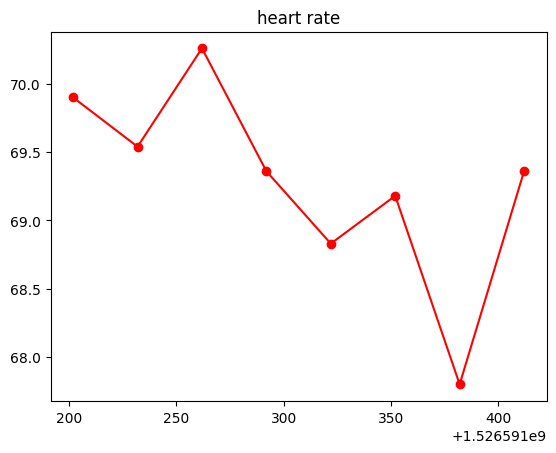

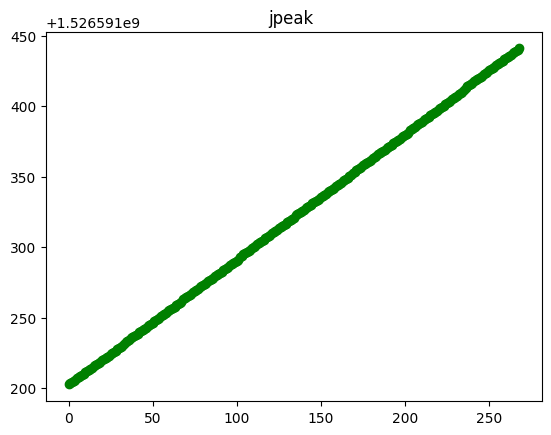

plots for Subject39_1526591202


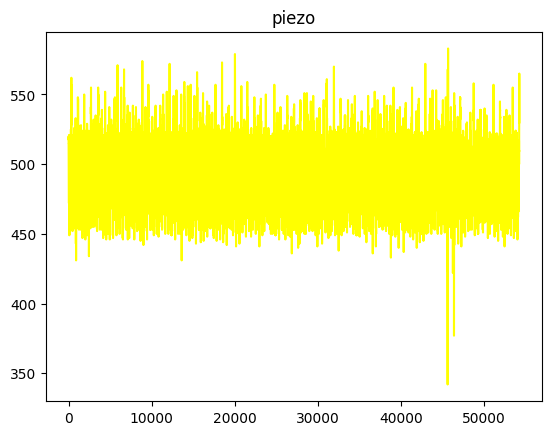

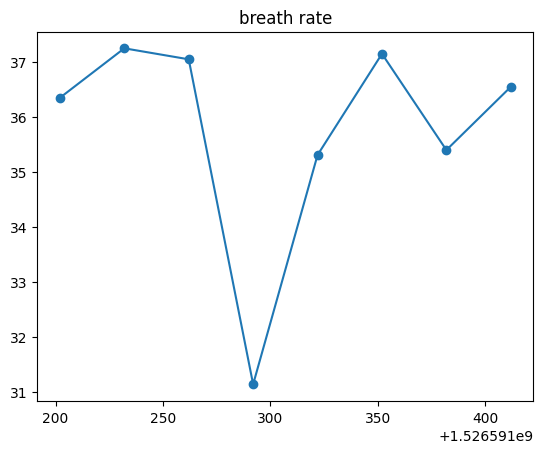

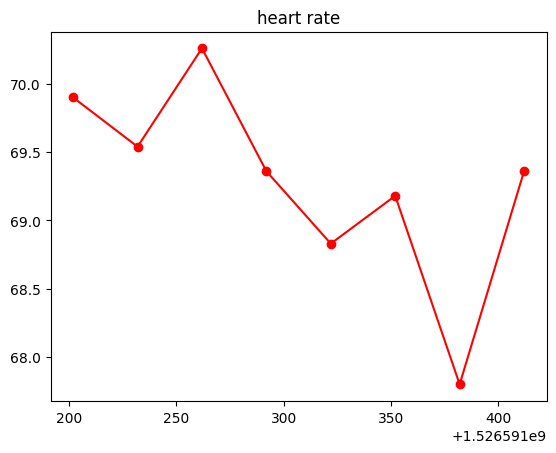

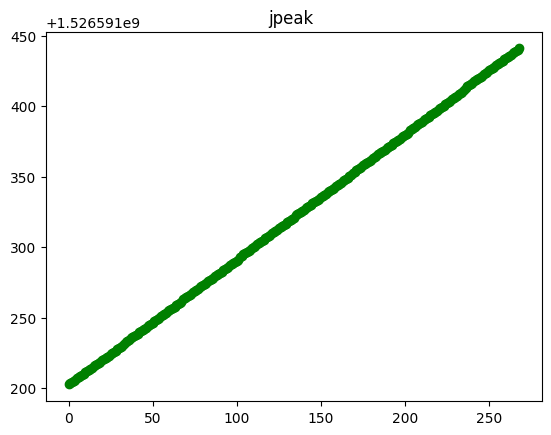

plots for Subject42_1527280030


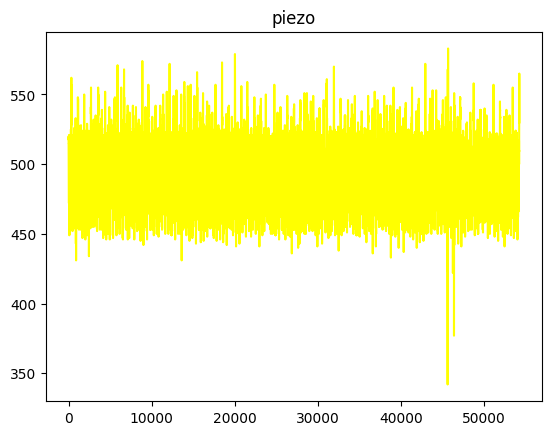

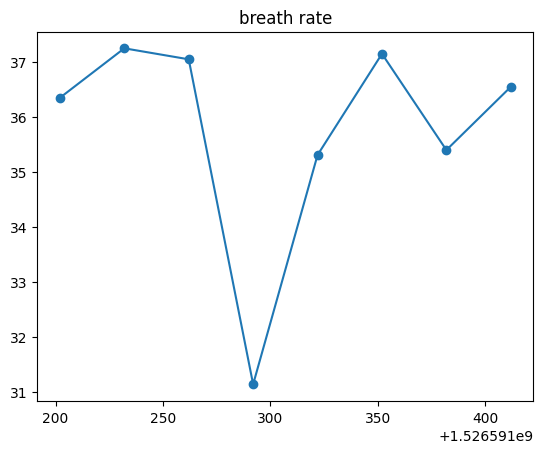

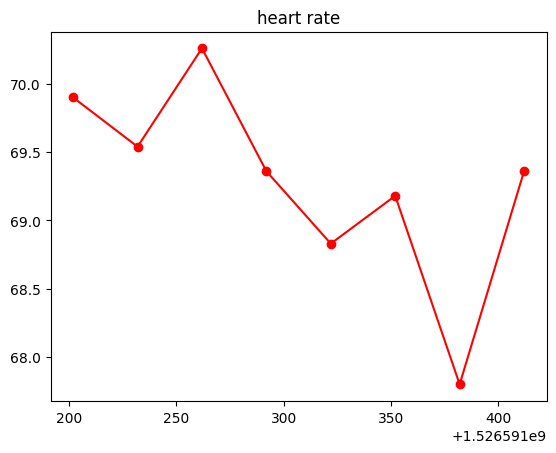

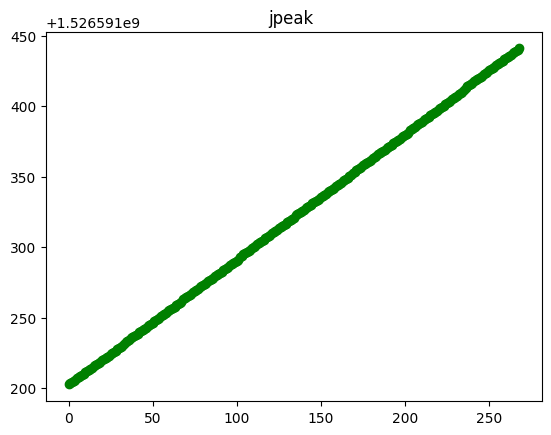

plots for Subject43_1527806941


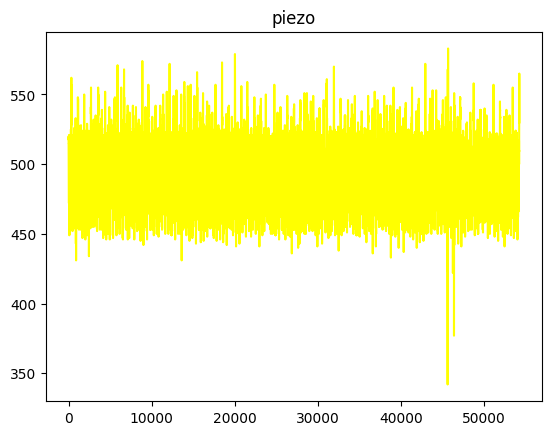

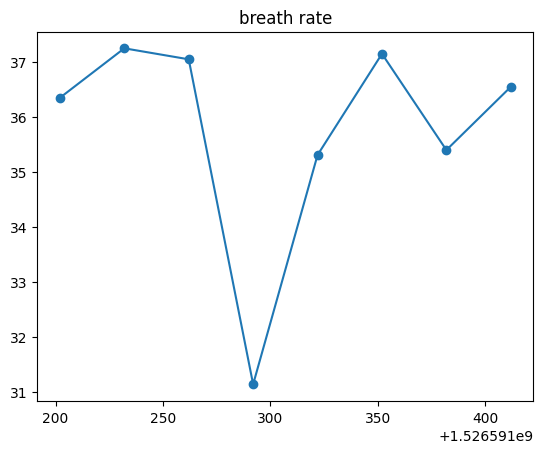

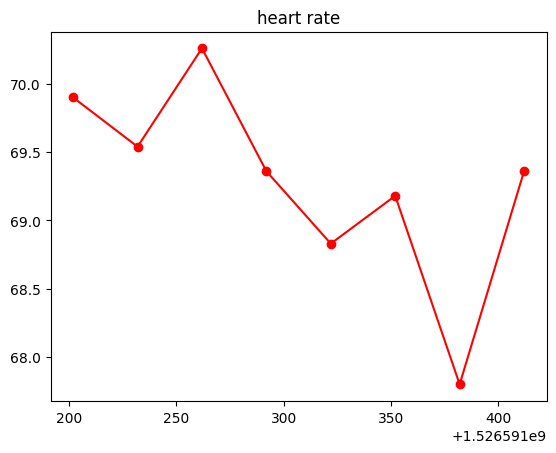

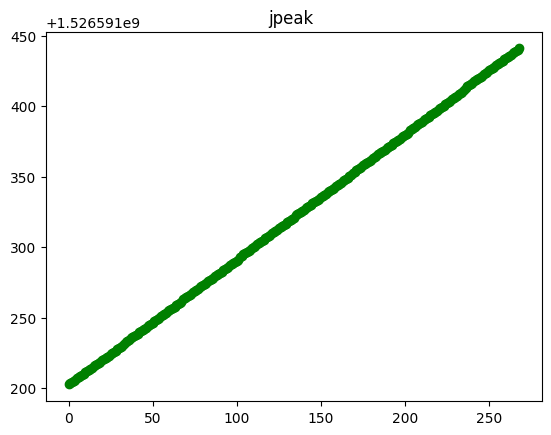

plots for Subject54_1539288817


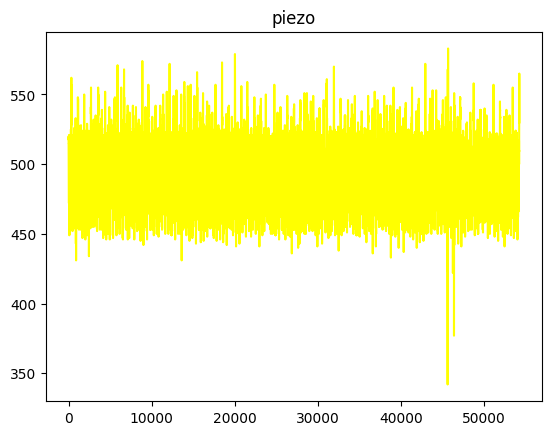

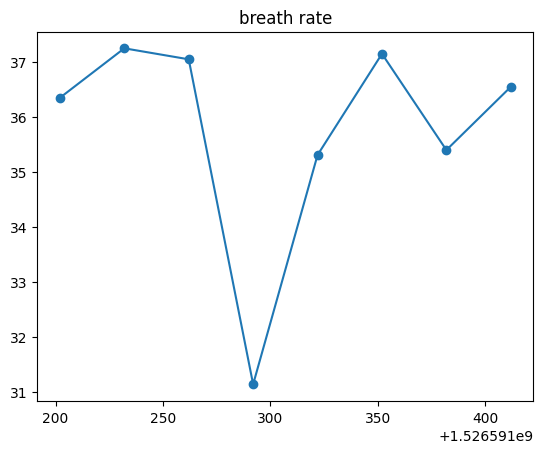

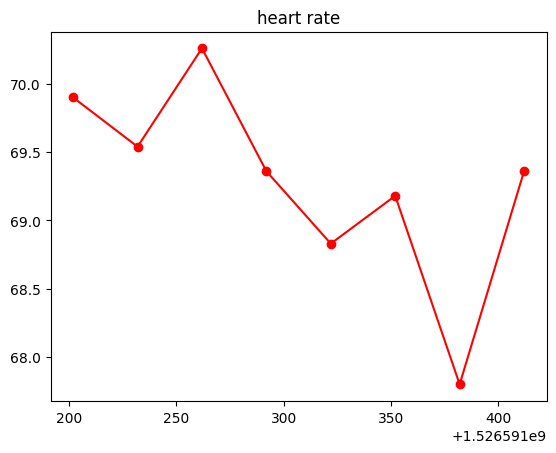

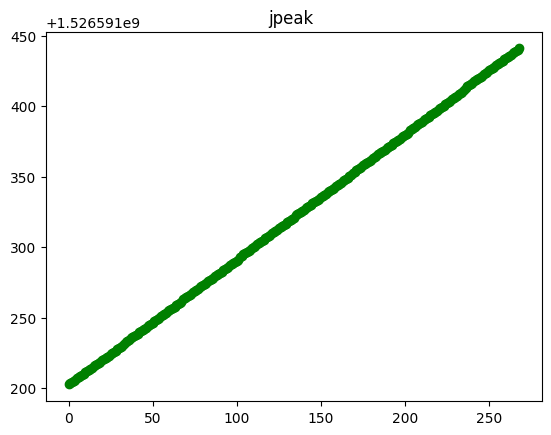

plots for Subject55_1539459892


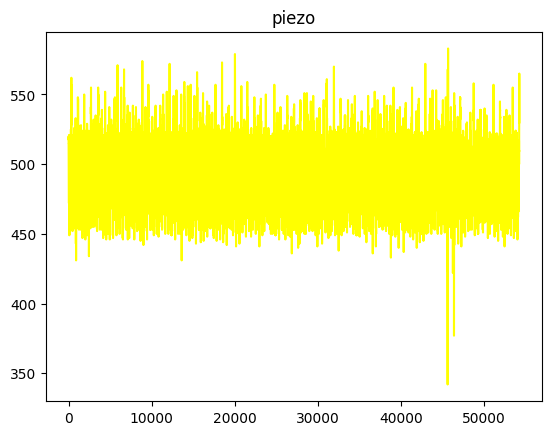

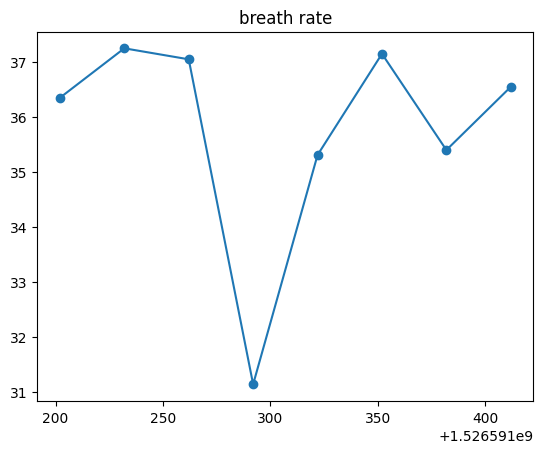

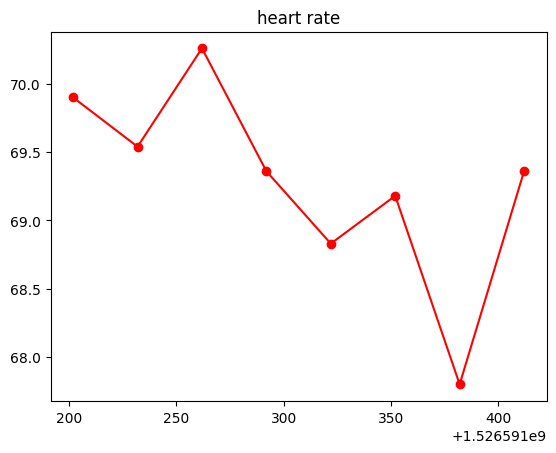

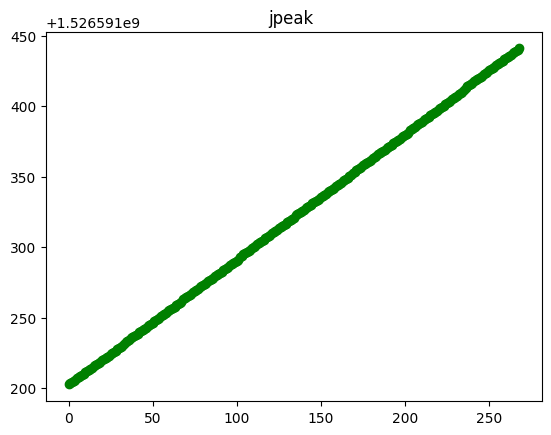

plots for Subject39_1526417507


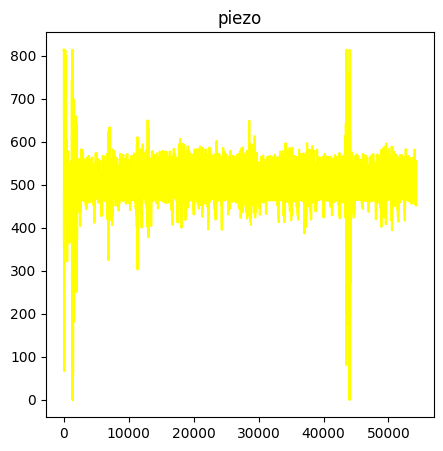

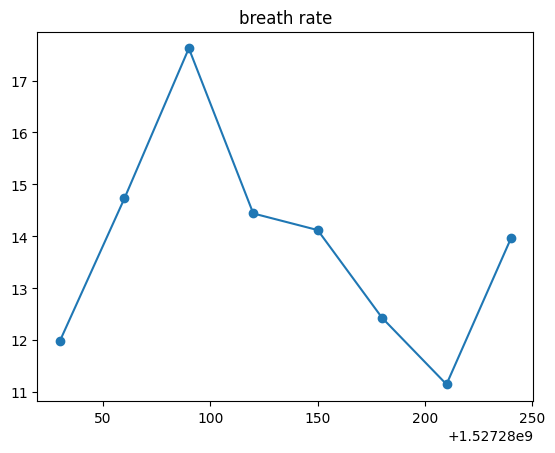

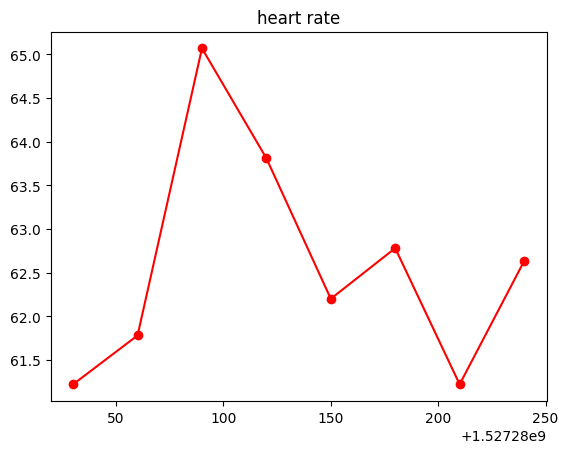

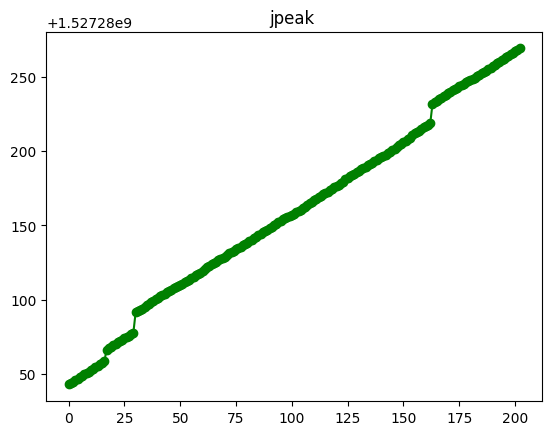

plots for Subject39_1526591202


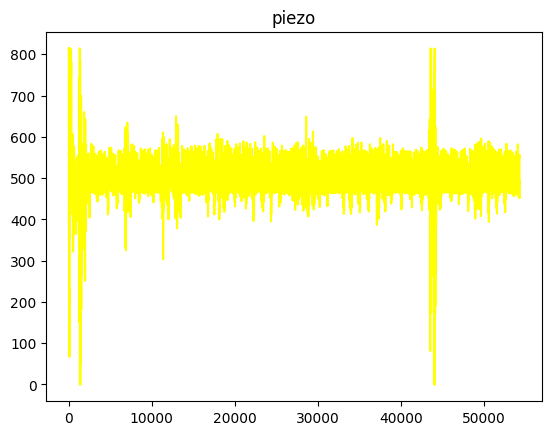

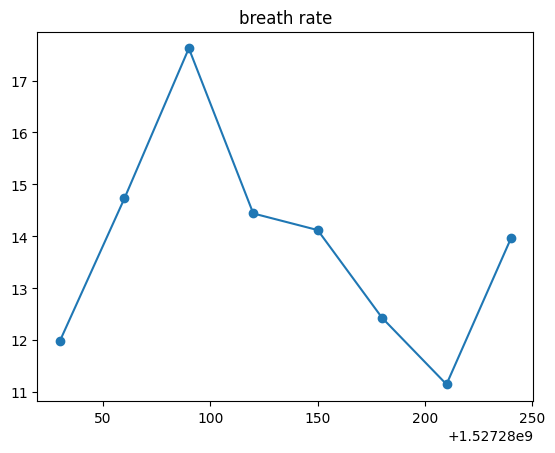

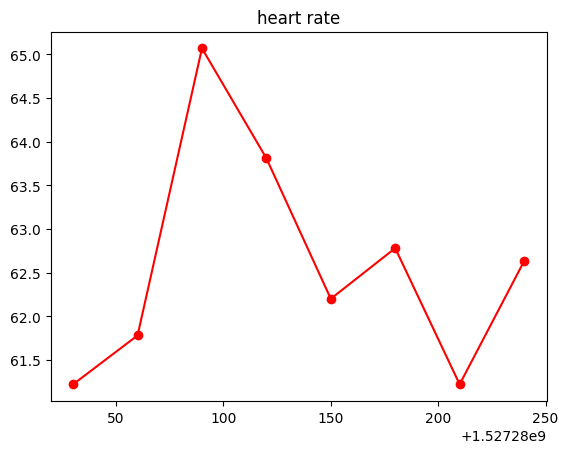

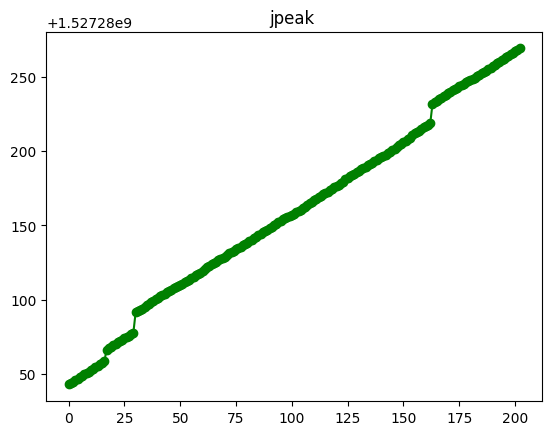

plots for Subject42_1527280030


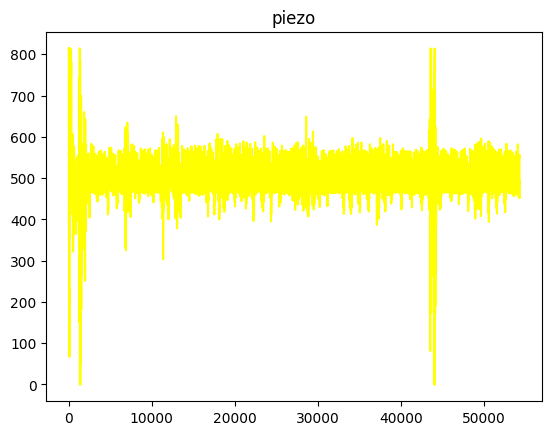

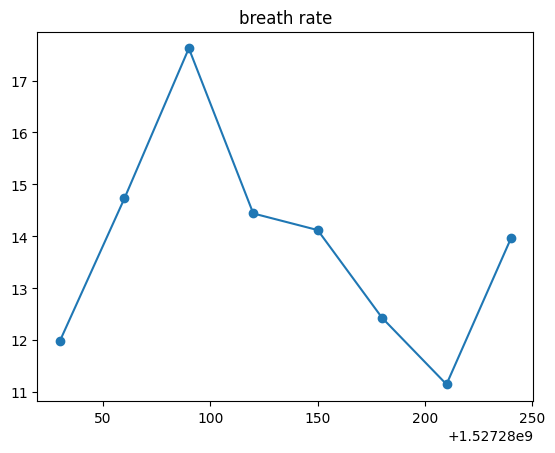

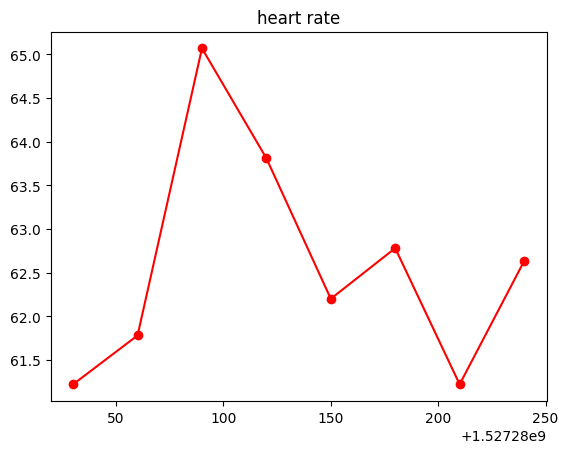

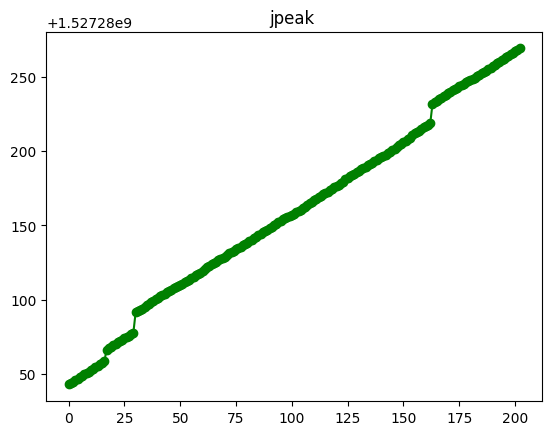

plots for Subject43_1527806941


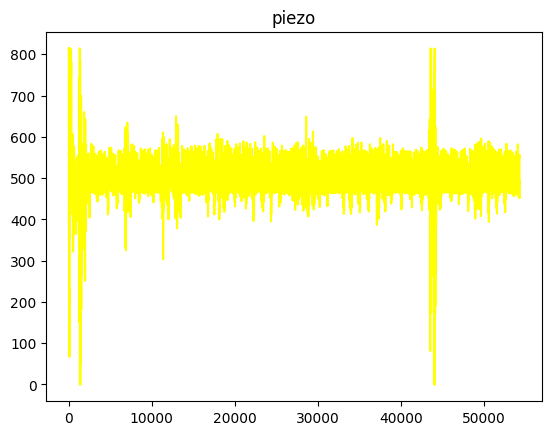

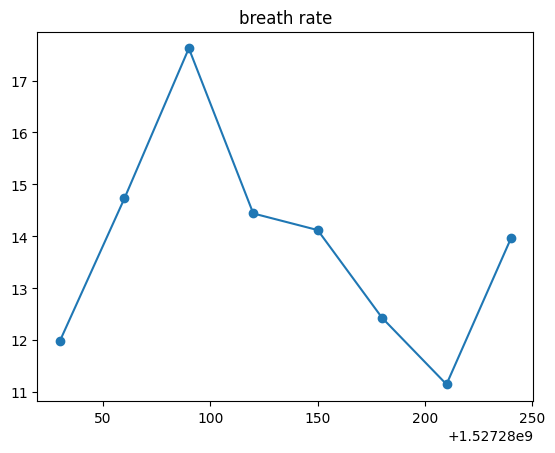

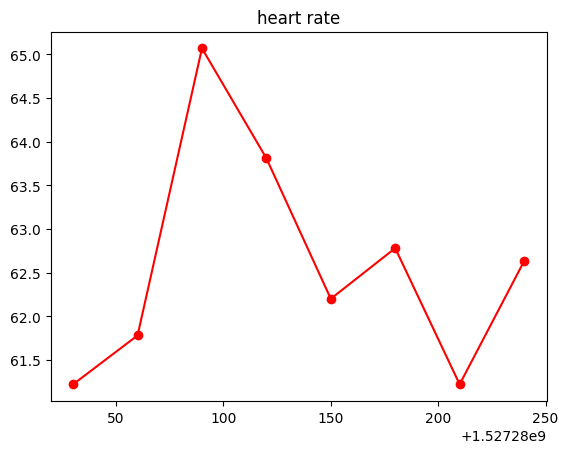

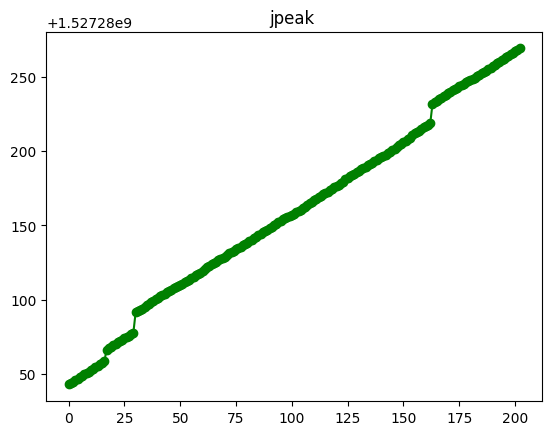

plots for Subject54_1539288817


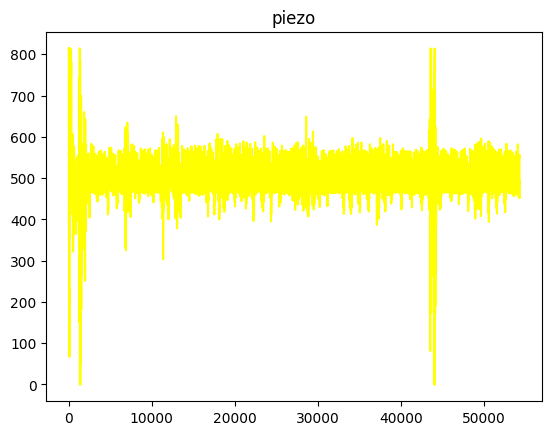

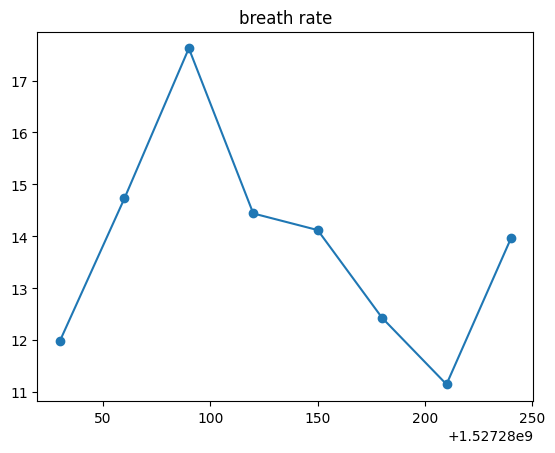

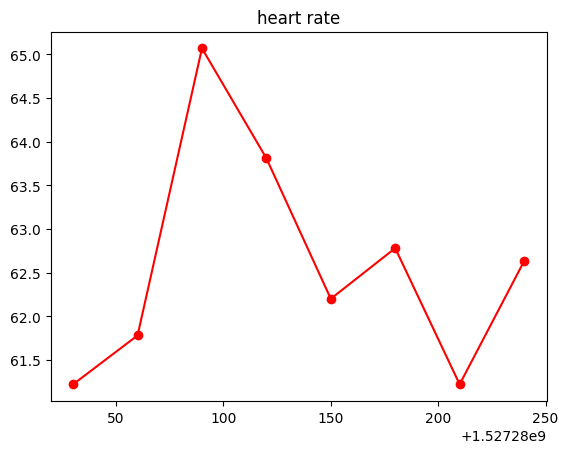

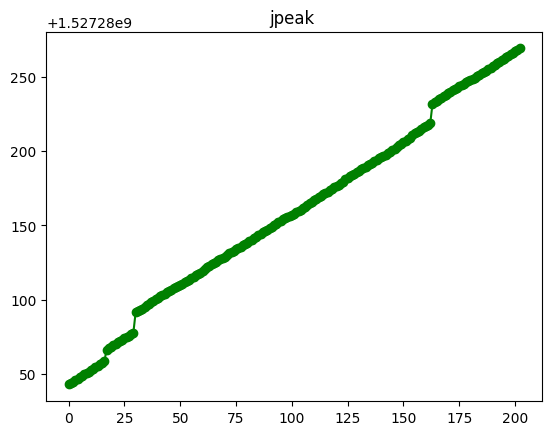

plots for Subject55_1539459892


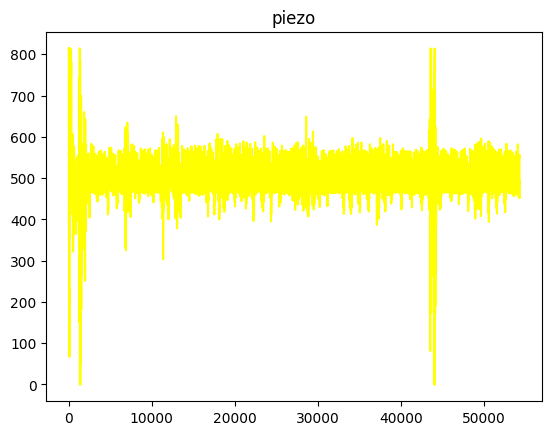

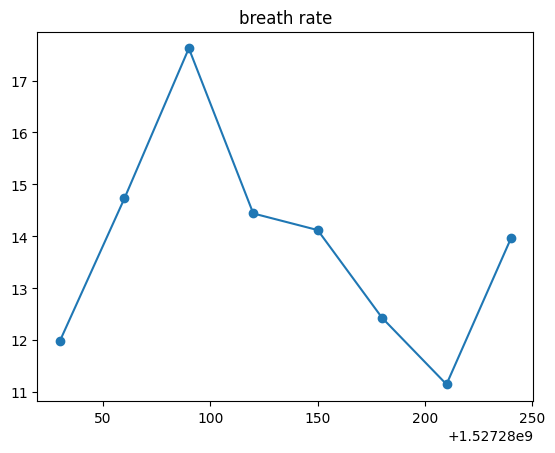

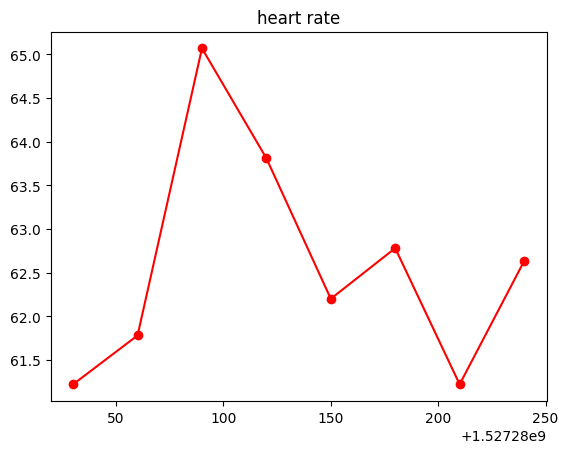

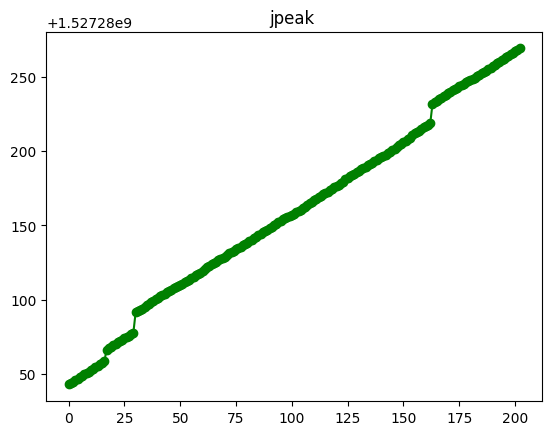

plots for Subject39_1526417507


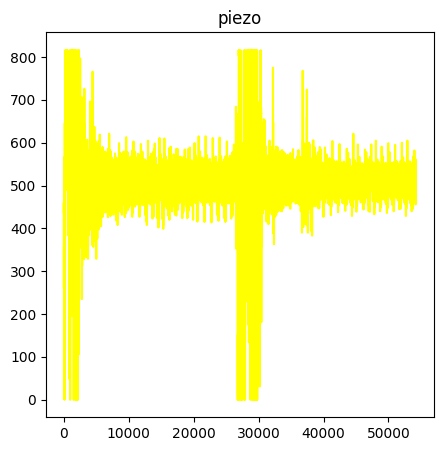

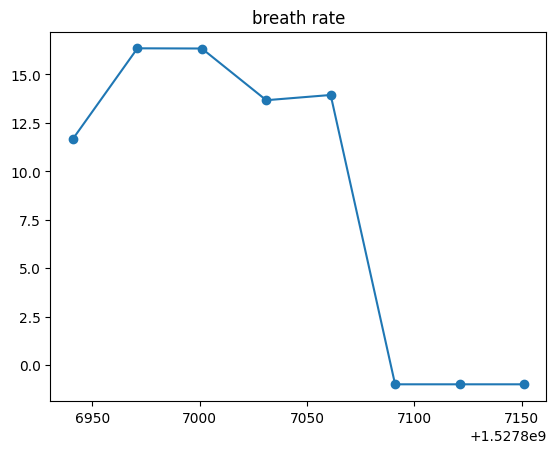

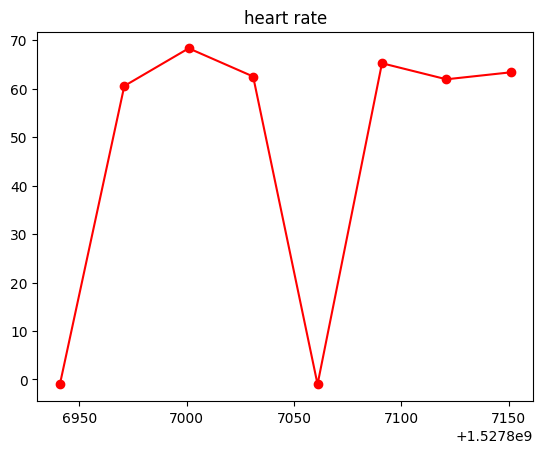

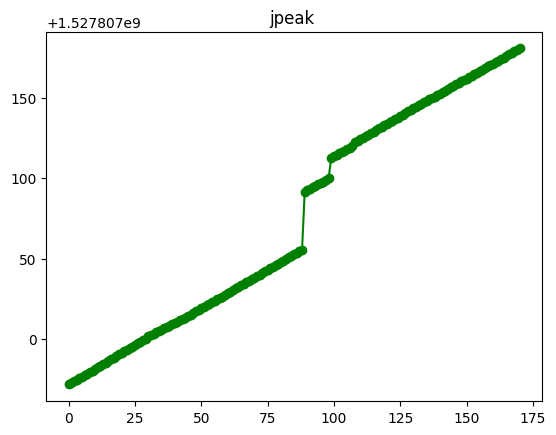

plots for Subject39_1526591202


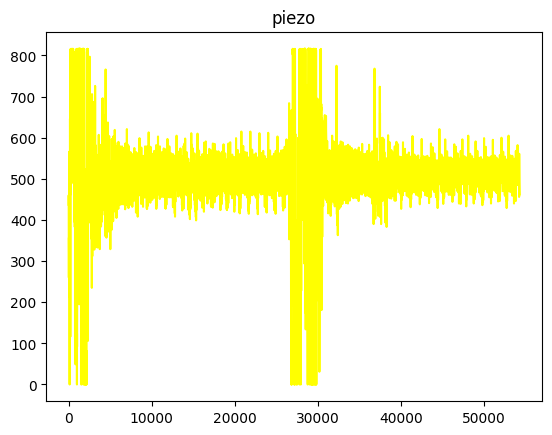

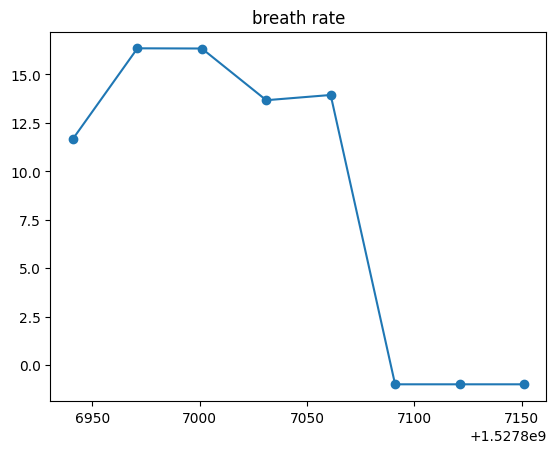

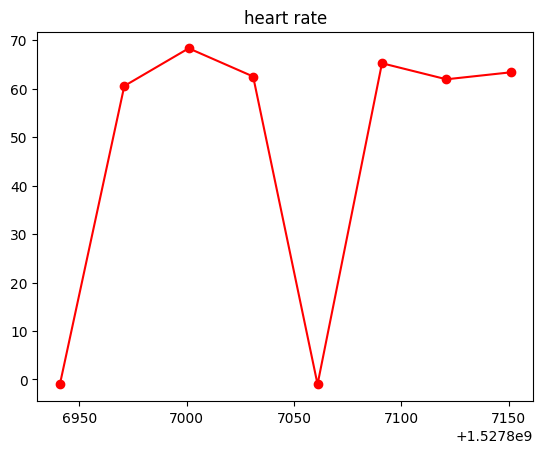

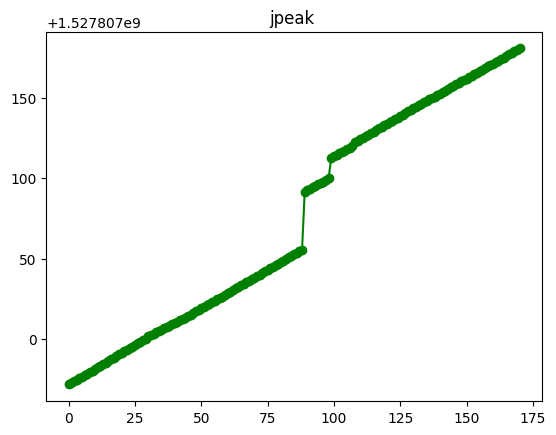

plots for Subject42_1527280030


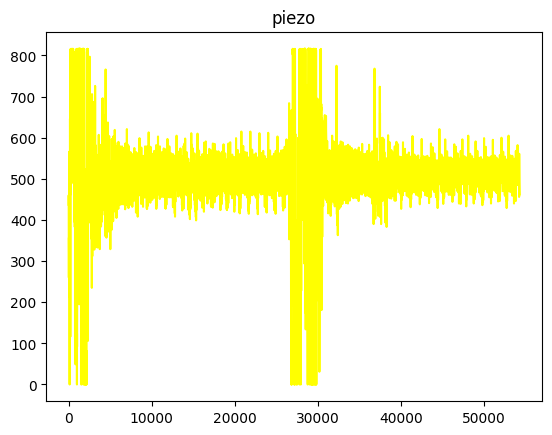

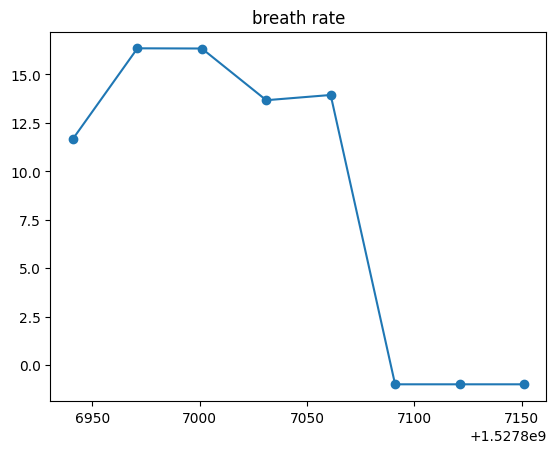

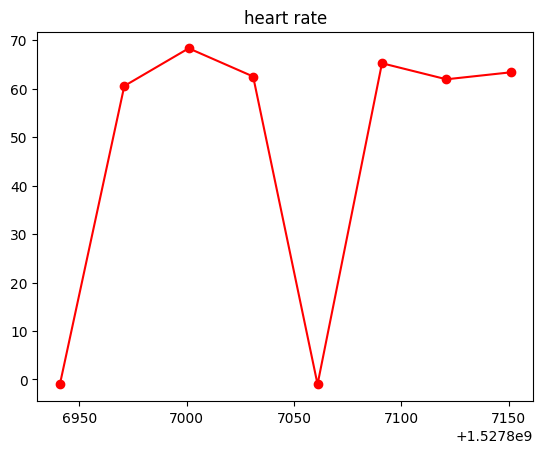

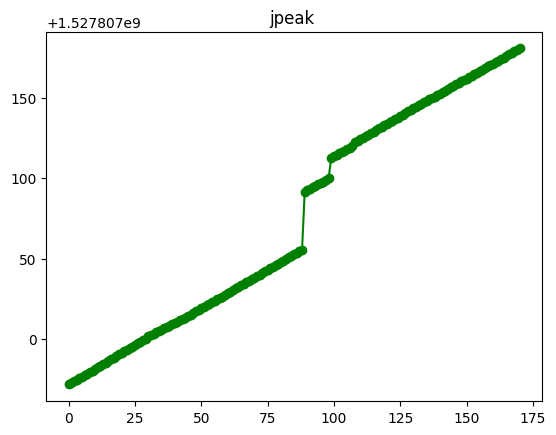

plots for Subject43_1527806941


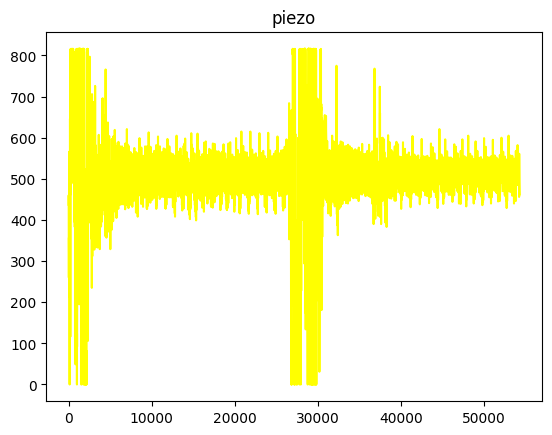

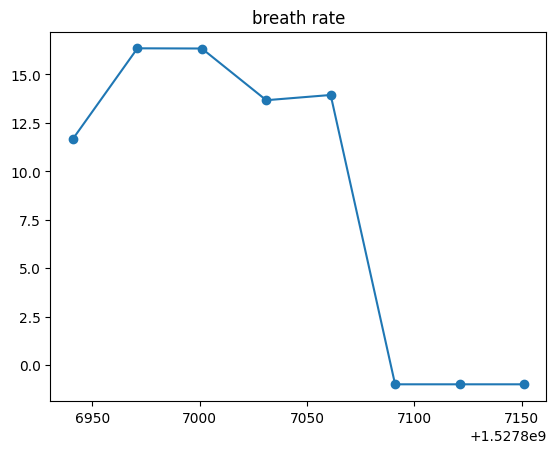

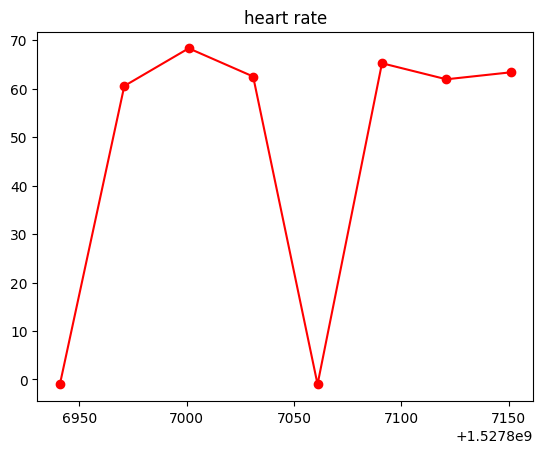

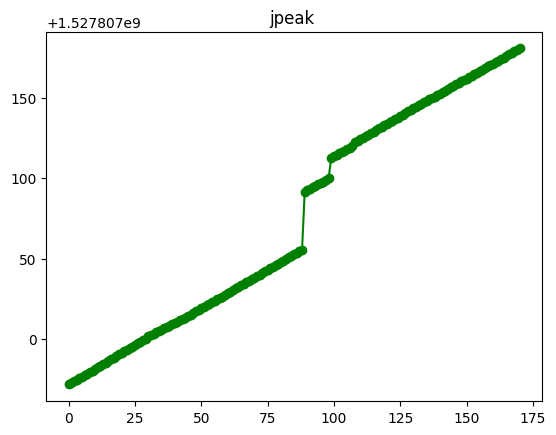

plots for Subject54_1539288817


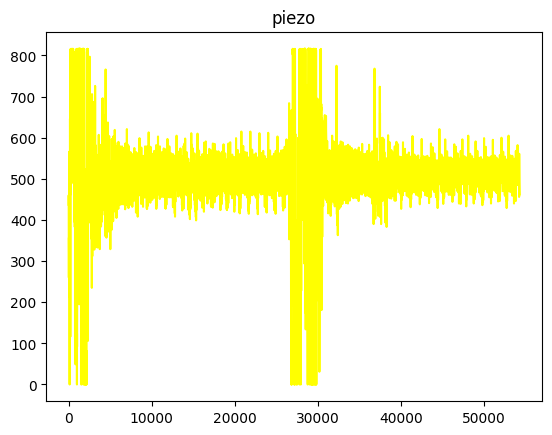

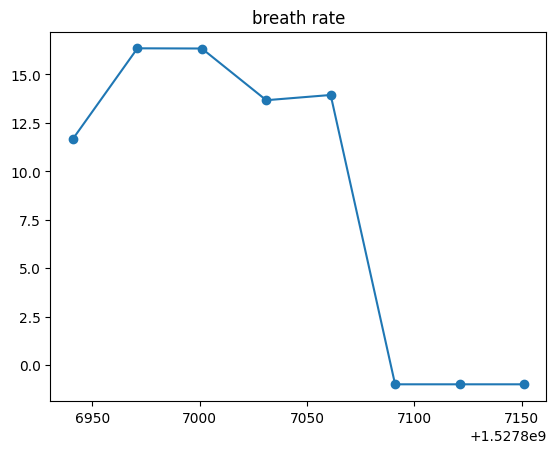

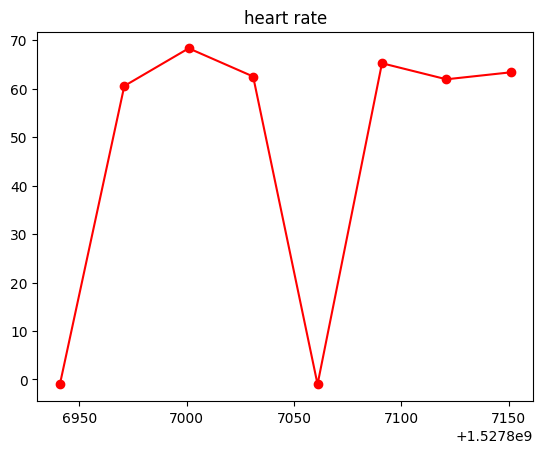

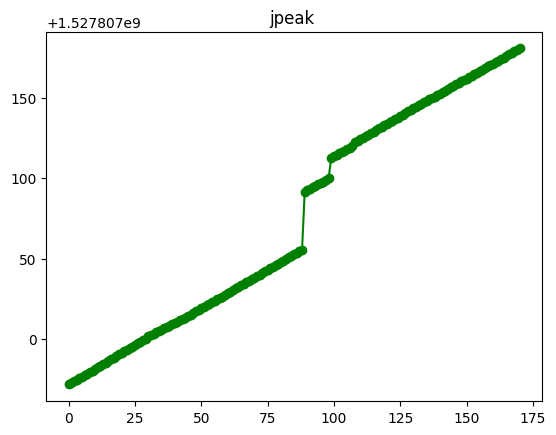

plots for Subject55_1539459892


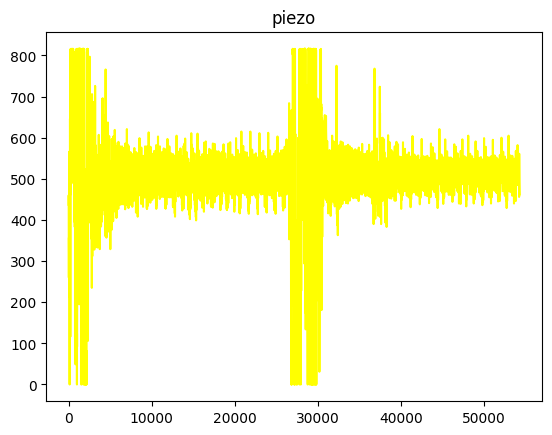

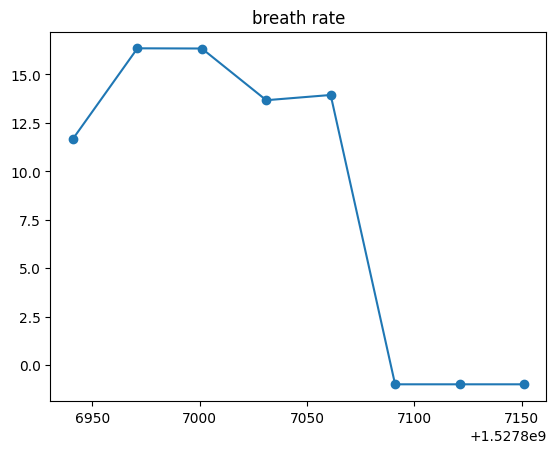

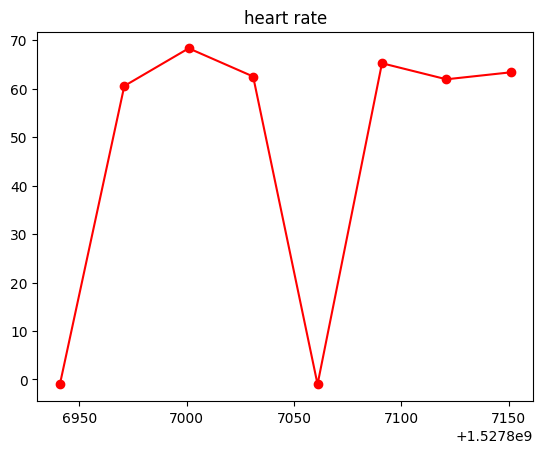

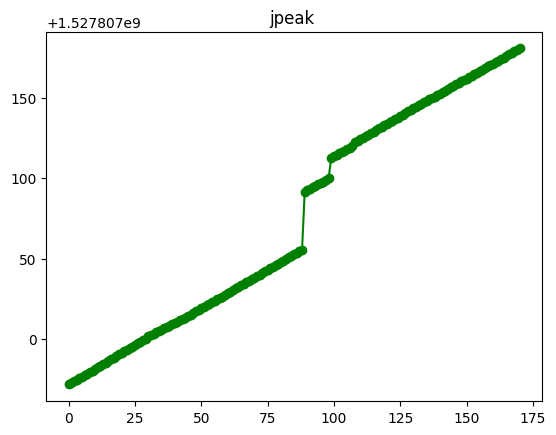

plots for Subject39_1526417507


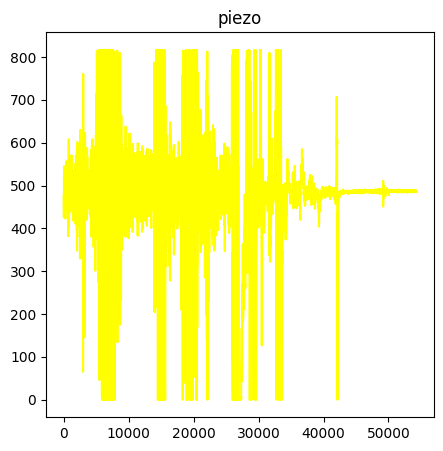

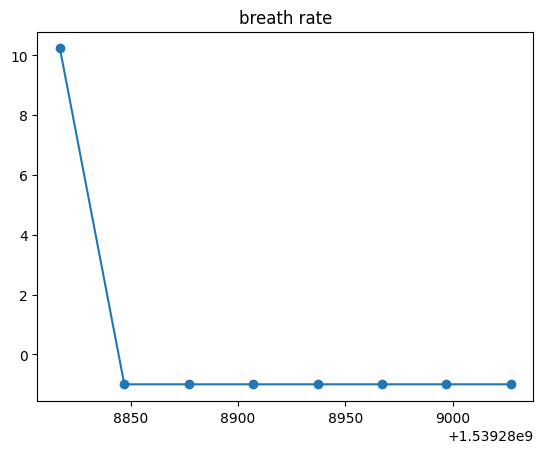

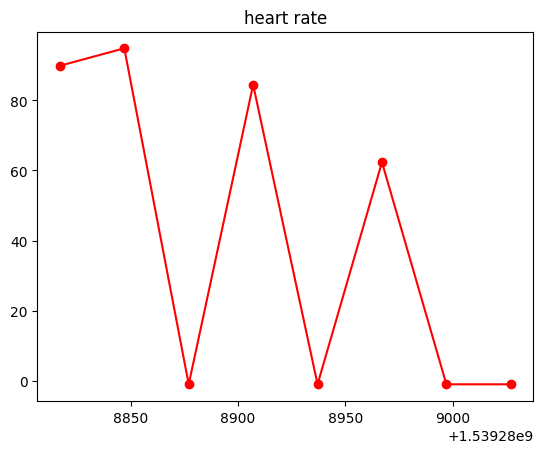

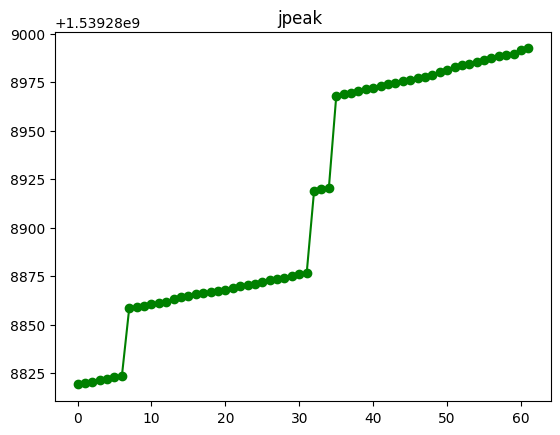

plots for Subject39_1526591202


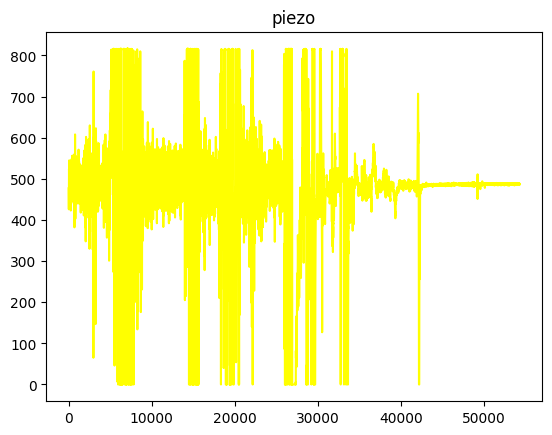

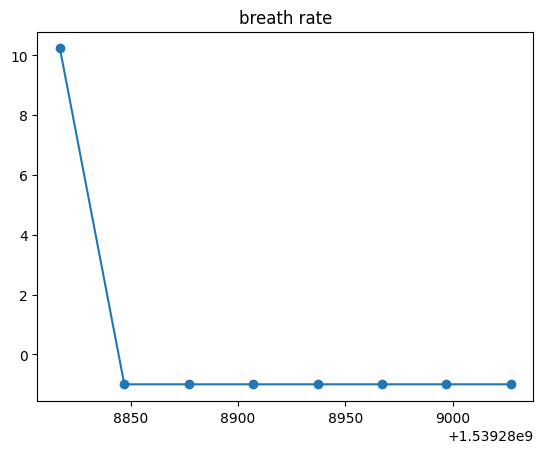

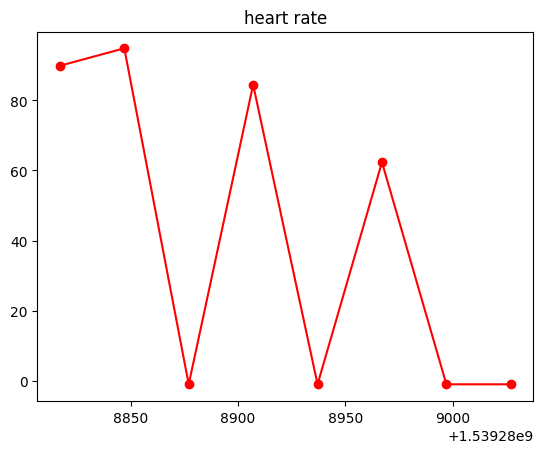

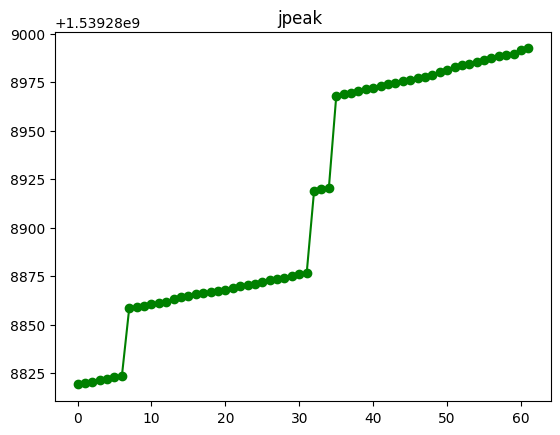

plots for Subject42_1527280030


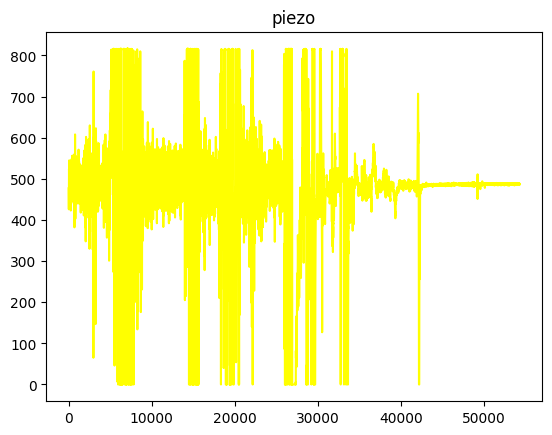

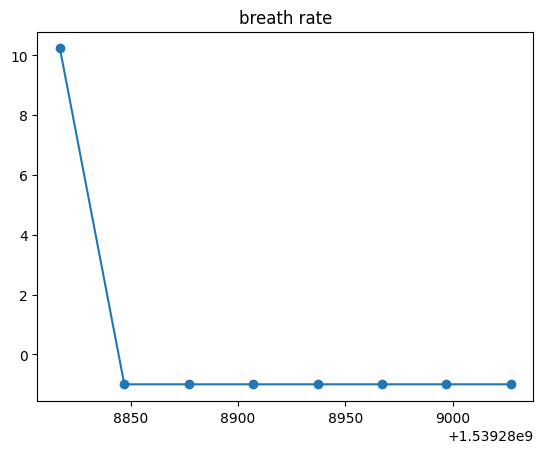

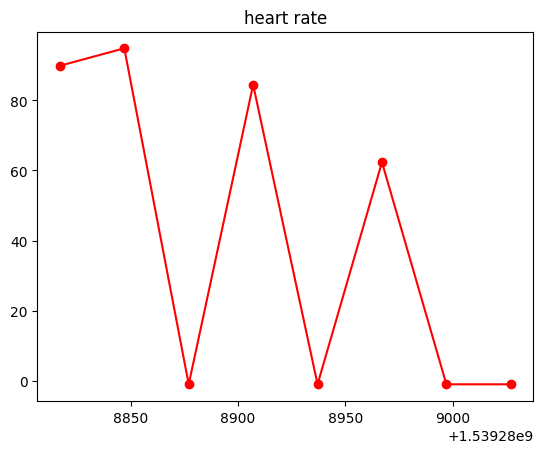

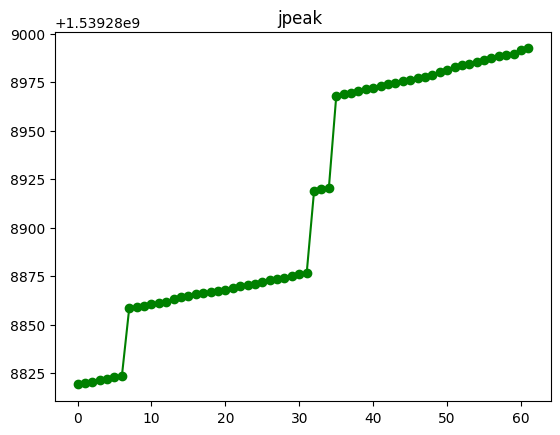

plots for Subject43_1527806941


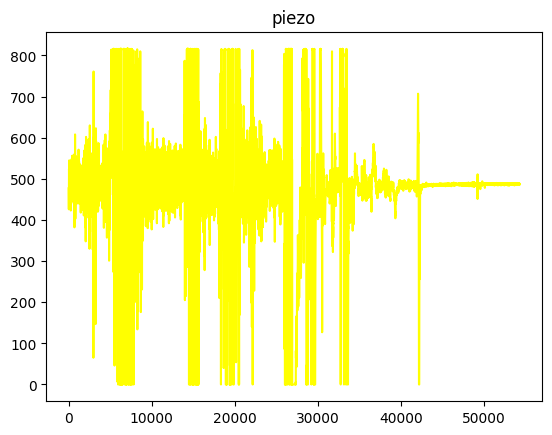

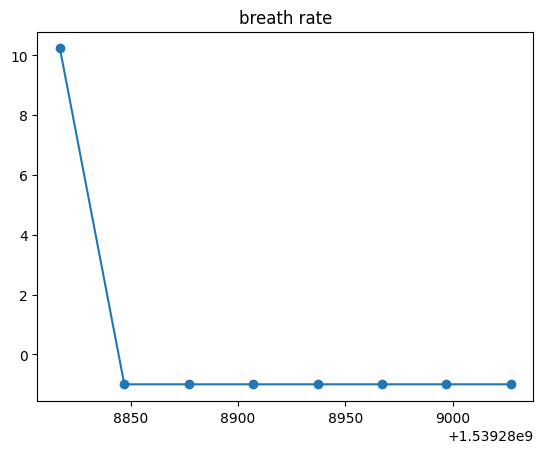

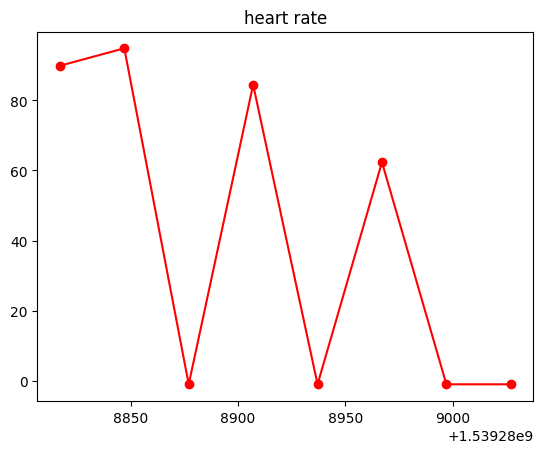

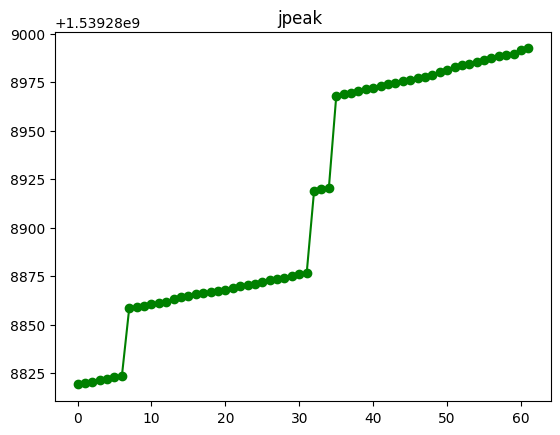

plots for Subject54_1539288817


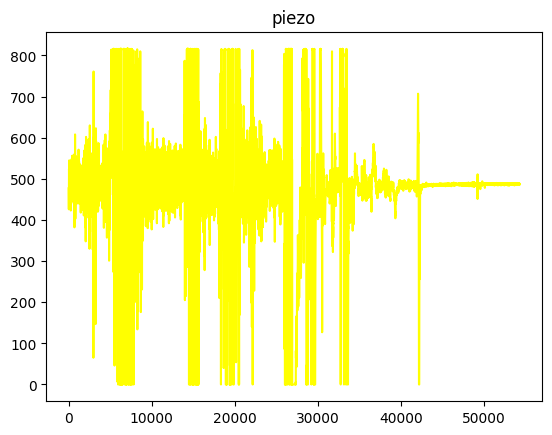

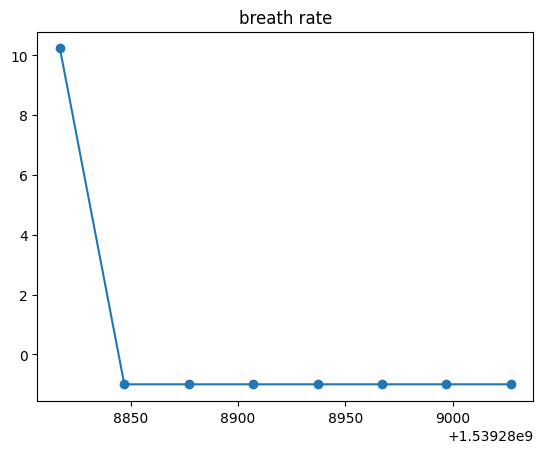

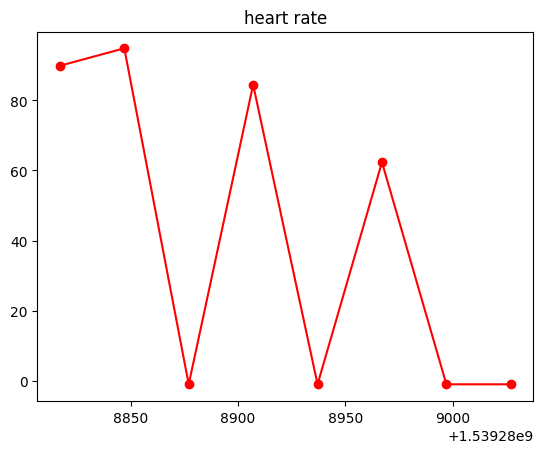

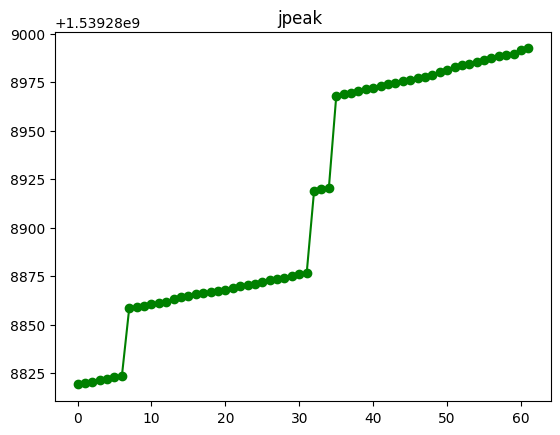

plots for Subject55_1539459892


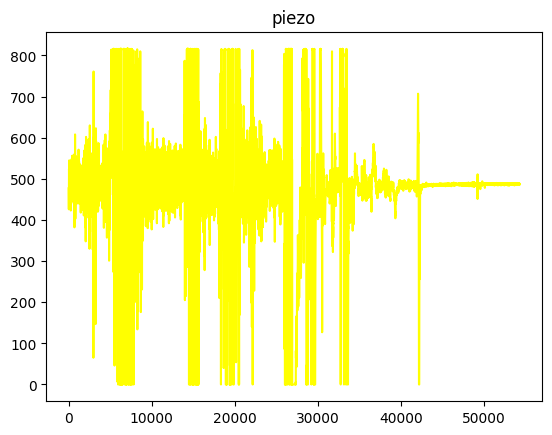

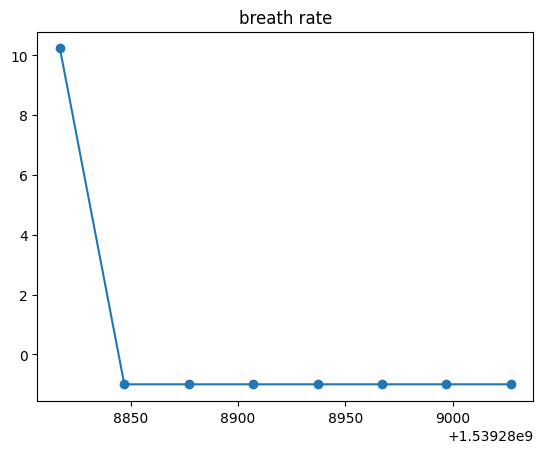

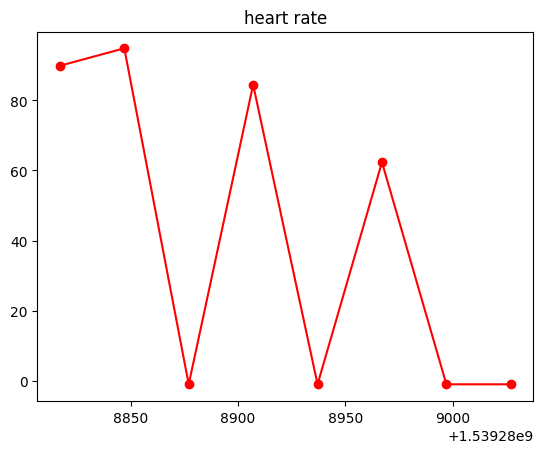

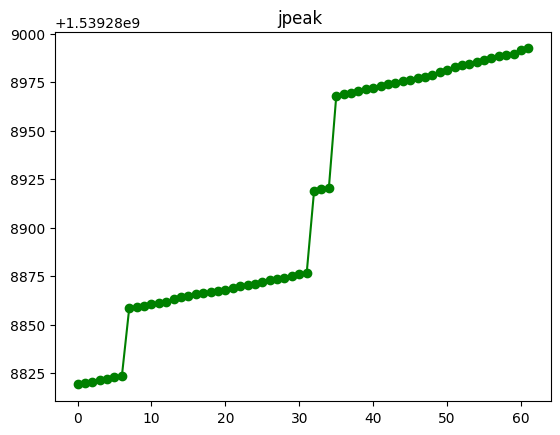

plots for Subject39_1526417507


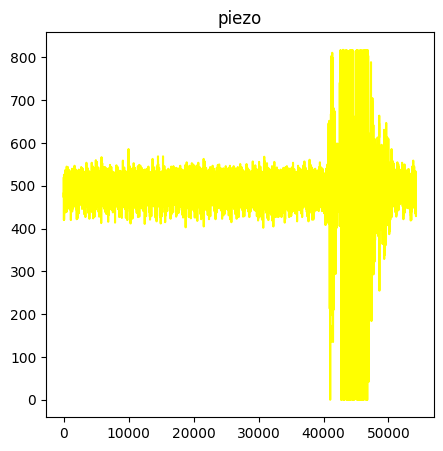

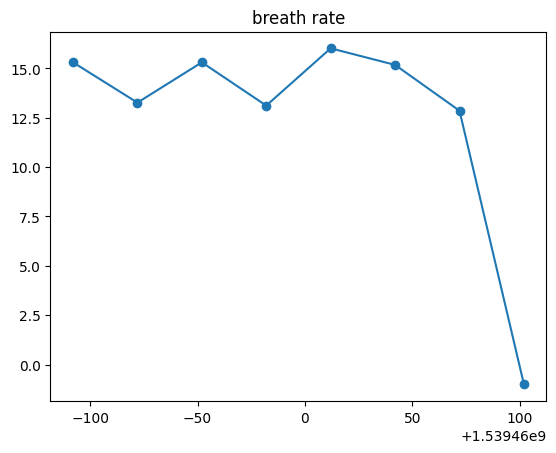

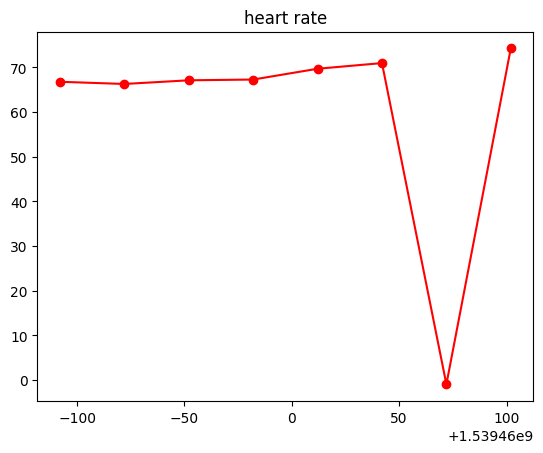

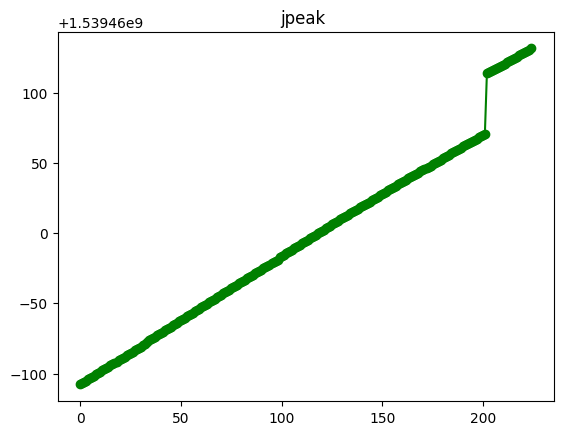

plots for Subject39_1526591202


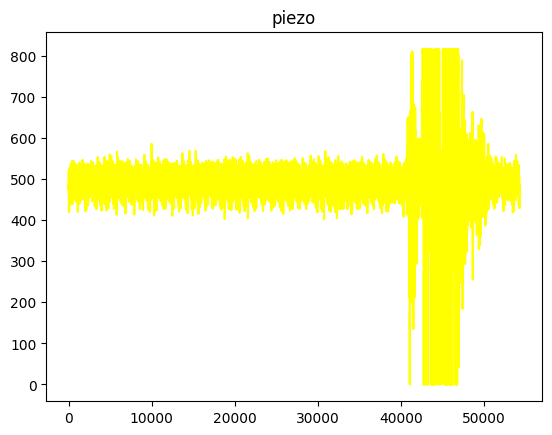

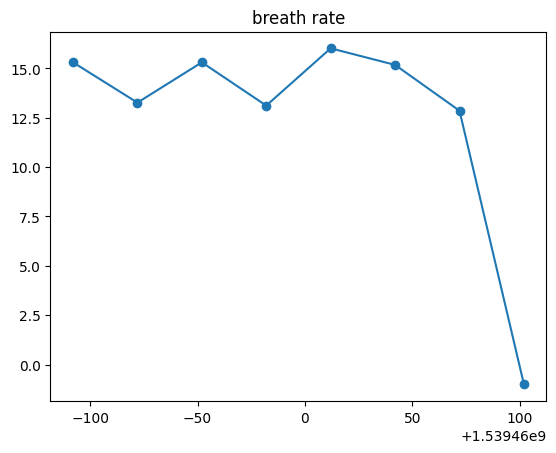

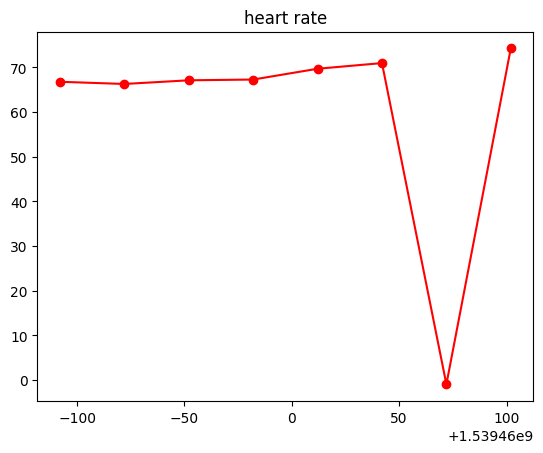

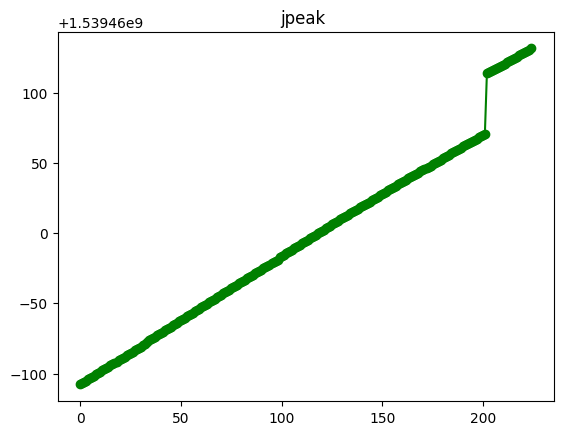

plots for Subject42_1527280030


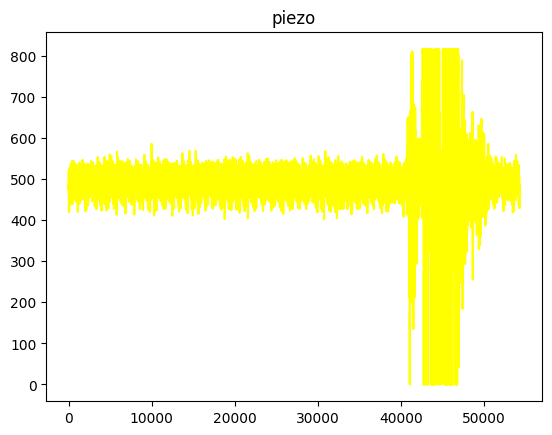

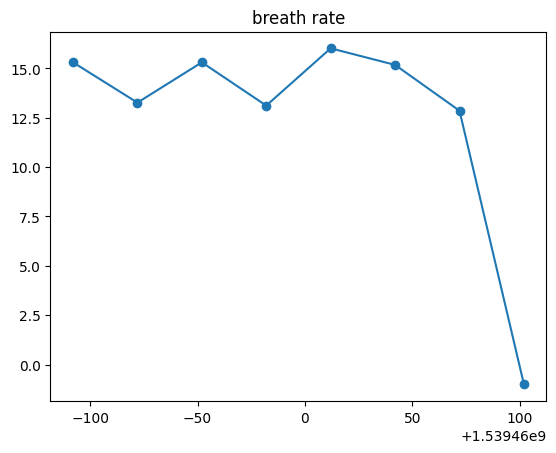

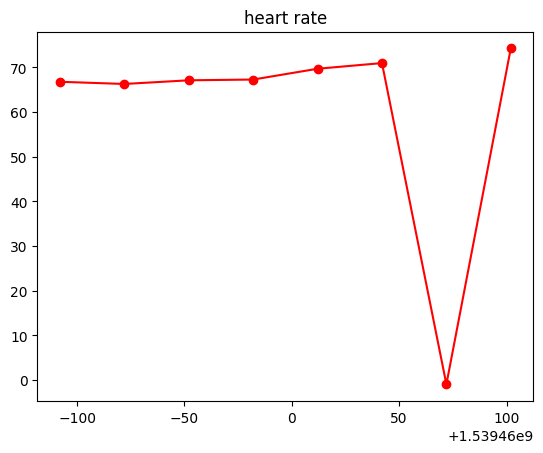

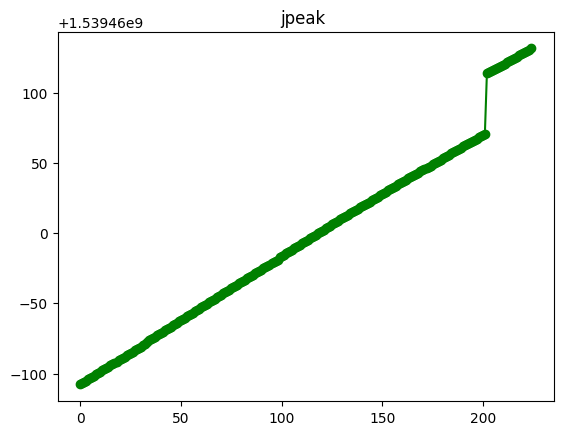

plots for Subject43_1527806941


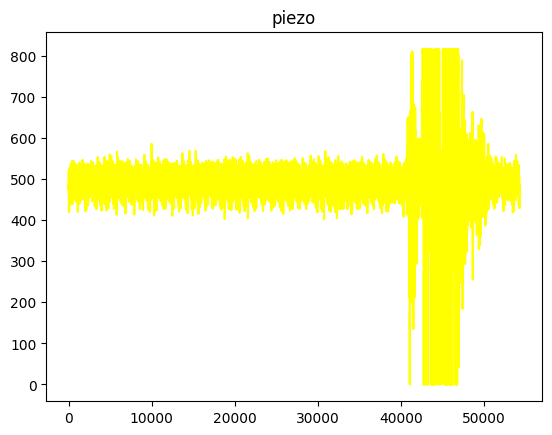

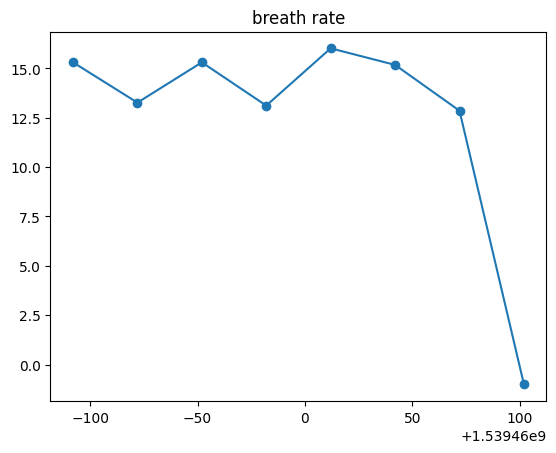

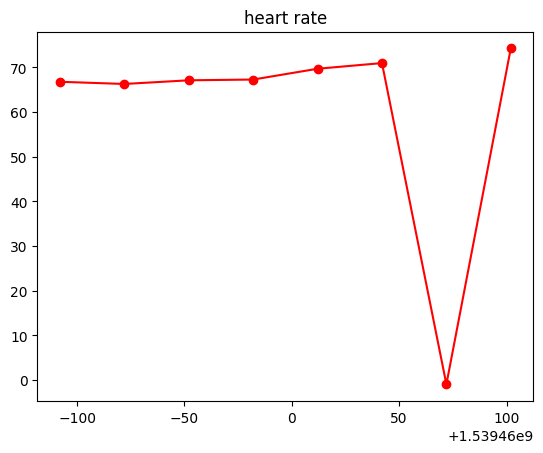

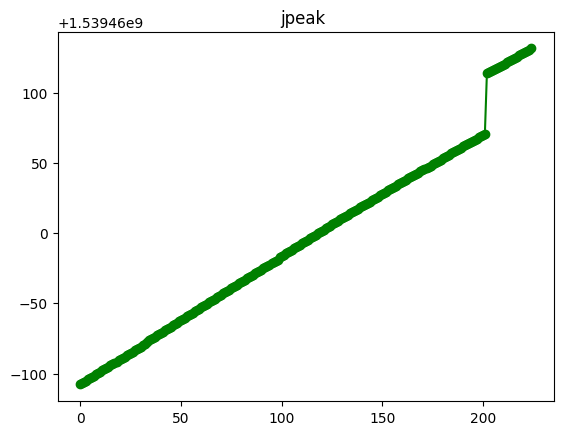

plots for Subject54_1539288817


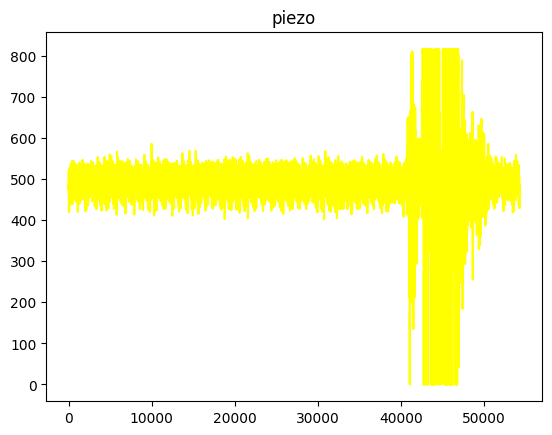

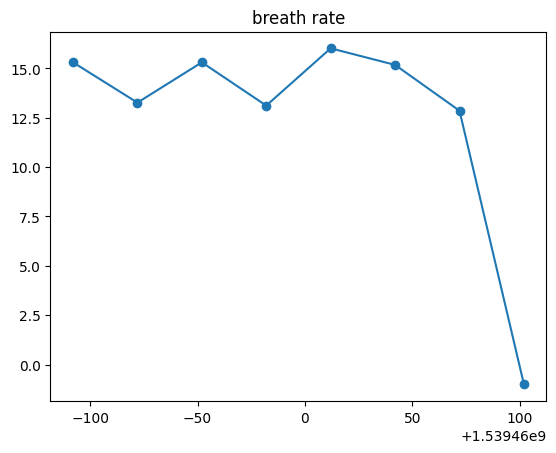

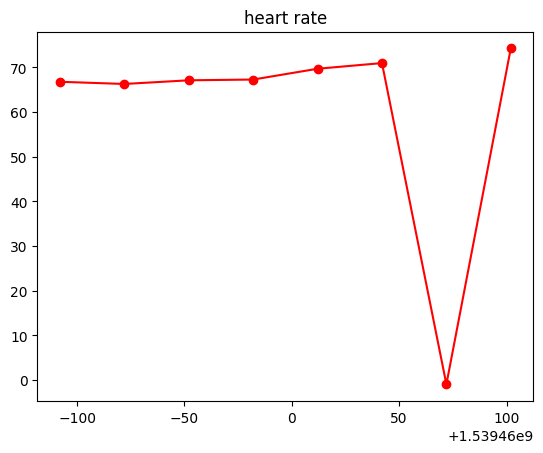

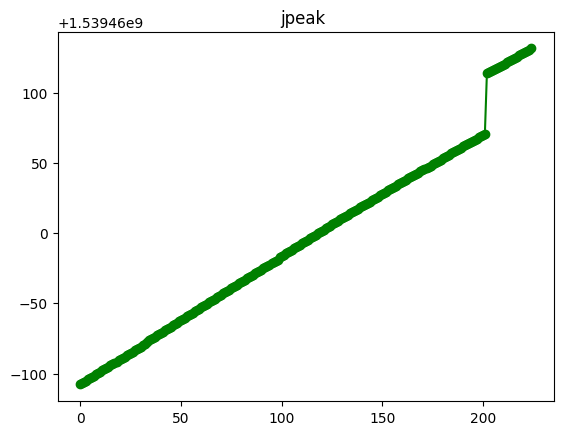

plots for Subject55_1539459892


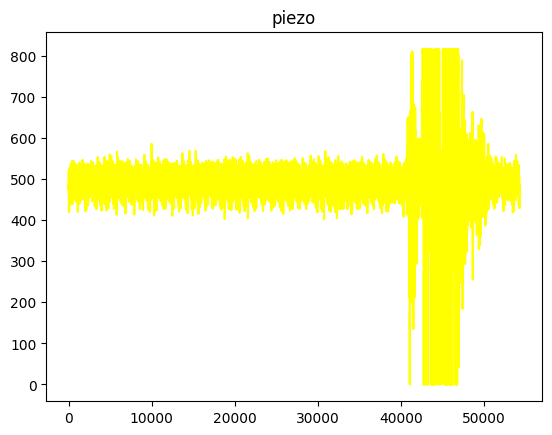

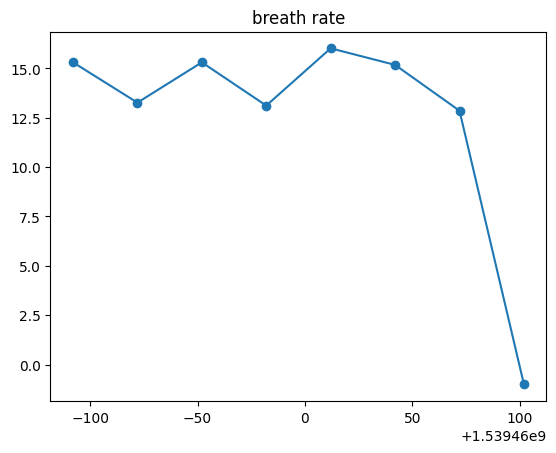

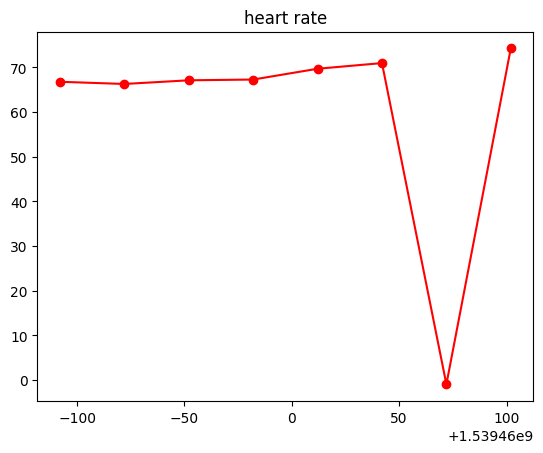

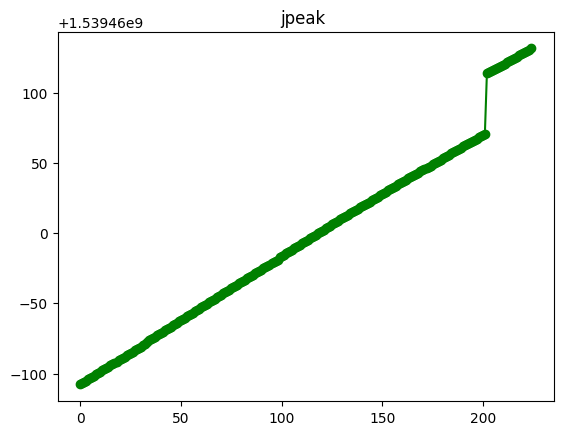

In [ ]:
for (piezo_path, breath_path, heart_path, jpeaks_path,) in file_paths:
    piezo_df = pd.read_csv(piezo_path, header = None)
    breathrate_df = pd.read_csv(breath_path, header = None)
    heartrate_df = pd.read_csv(heart_path, header = None)
    jpeaks_df = pd.read_csv(jpeaks_path, header = None)

    # Get values out of dataframes

    # Peizo
    piezo_reading = piezo_df[0].values
    # Breathrates
    timestamps = breathrate_df[0].values
    breath_rate = breathrate_df[1].values
    # Heartrates
    heart_rate = heartrate_df[1].values
    # jpeaks
    j_peak = jpeaks_df[0].values




    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(5)
    for i in subjects:
      print("plots for",i)
      plt.plot(piezo_reading,color="yellow")
      plt.title("piezo")
      plt.show()
      plt.plot(timestamps, breath_rate, marker = 'o')
      plt.title("breath rate")
      plt.show()
      plt.plot(timestamps, heart_rate, marker = 'o',color="red")
      plt.title("heart rate")
      plt.show()
      plt.plot(j_peak, marker = 'o',color="green")
      plt.title("jpeak ")
      plt.show()


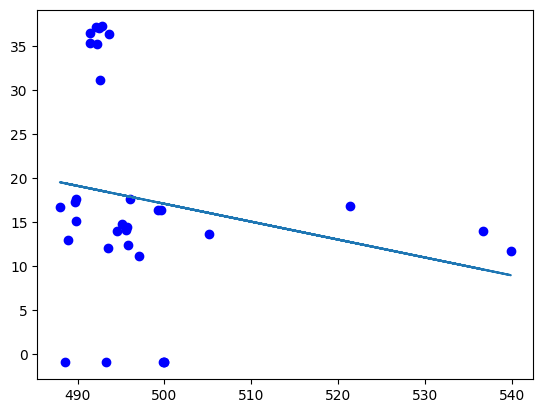

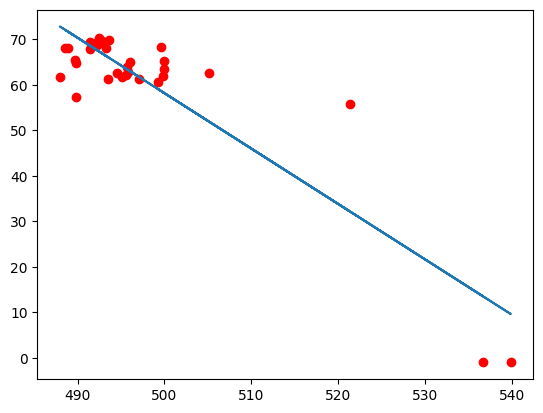

In [ ]:
interval = 6780
cumu_breathrates = []
cumu_heartrates = []
cumu_piezo = []
# considering only first 4 datasets
for sub in range(4):

    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values # Numpy 1D array
    heartrates = pd.read_csv(file_paths[sub][2], header=None).iloc[:, 1].values

    cumu_breathrates += list(breathrates)
    cumu_heartrates += list(heartrates)

    x = [] # 8 membered list - Averaged out peizo

    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]

    cumu_piezo += x



# Plot for breathrates
plt.scatter(np.array(cumu_piezo), np.array(cumu_breathrates), color = "blue")

m, b = np. polyfit(np.array(cumu_piezo),np.array(cumu_breathrates), 1)
plt.plot(np.array(cumu_piezo), m*np.array(cumu_piezo) + b)
plt.show()

# Plot for heartrates
plt.scatter(np.array(cumu_piezo), np.array(cumu_heartrates), color = "red")

m, b = np. polyfit(np.array(cumu_piezo),np.array(cumu_heartrates), 1)
plt.plot(np.array(cumu_piezo), m*np.array(cumu_piezo) + b)
plt.show()

# Plot of breathrates (BLUE) and a regression line
# Plot of heartrates (RED) and its regression line